# 1. Introduction

**Phase 1 - Milestone 2**

**Name**    : Verren Monica

**Batch**   : RMT - 038

**Data Source Link**: [Loan Approval Classification Dataset](https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data)

# 2. Background and Objectives

**Background Problems** : 

Proses persetujuan pinjaman di bank sering kali melibatkan banyak faktor yang kompleks dan memerlukan waktu yang cukup lama untuk menganalisis data pemohon. Mengingat pentingnya keputusan ini bagi bank, penggunaan metode yang dapat mempercepat proses dan tetap memastikan akurasi sangat penting dan krusial. Bank perlu mengurangi risiko kesalahan dalam menilai kelayakan kredit, agar tidak menyetujui pemohon yang berisiko tinggi dan tidak menolak pemohon yang layak. Dalam hal ini, kemampuan untuk prediksi apakah seorang pemohon dapat mengembalikan pinjaman mereka menjadi sangat penting untuk menjaga kestabilan keuangan bank. Jika salah dalam memprediksi, bank bisa mengalami kerugian besar akibat gagal bayar dan kehilangan peluang untuk memperoleh keuntungan dari pemohon yang layak.

Oleh karena itu, tujuan dari project ini adalah membuat model machine learning yang dapat secara cepat mengidentifikasi pemohon yang layak dan yang berisiko.  Dengan meningkatkan kecepatan dan ketepatan analisis, bank tidak hanya mengurangi risiko, tetapi juga meningkatkan pengalaman pelanggan dengan proses yang lebih cepat. 

Penerapan model machine learning dengan algoritma klasifikasi dapat membantu bank membuat keputusan yang lebih objektif dan berbasis data, mengurangi ketergantungan pada evaluasi subjektif serta dapat meningkatkan profitabilitas bank dengan meminimalkan kerugian dan mempercepat proses persetujuan pinjaman​. 

Model machine learning akan dikembangkan menggunakan beberapa algoritma klasifikasi seperti Logistic Regression, KNN, SVM, Decision Tree, Random Forest, dan XGBoost yang kemudian akan dievaluasi dengan metriks evaluasi accuracy untuk melihat seberapa tepat model dalam memprediksi dan model juga akan dievaluasi menggunakan ROC AUC score untuk melihat seberapa mampu model dalam memisahkan kelas. Oleh karena adanya penggunaan metriks evaluasi accuracy, pada proses persiapan model akan dilakukan data balancing jika jumlah rejected dan accpeted dalam dataset tidak balance.

Model dengan hasil evaluasi terbaik akan dipilih untuk memprediksi data inference dan di-deploy agar dapat digunakan oleh bank atau lembaga keuangan untuk memproses dan mengevaluasi pengajuan pinjaman secara efektif.


**Justification** :

- [Durasi Pengajuan Kartu Kredit BNI](https://uangsolusi.com/berapa-lama-pengajuan-kartu-kredit-bni/0)
- [Improving Loan Approval Processes with Machine Learning Models in Fintech](https://www.rapidcanvas.ai/blogs/improving-loan-approval-processes-with-machine-learning-models-in-fintech)
- [International Journal of Research Publications and Reviews - Loan Approval Prediction Using Machine Learning](https://ijrpr.com/uploads/V5ISSUE1/IJRPR21516.pdf)


**Objectives**:

Membuat model machine learning berbasis algoritma klasifikasi seperti Logistic Regression, KNN, SVM, Decision Tree, Random Forest, dan XGBoost. Model akan dievaluasi menggunakan metriks evaluasi accuracy dan ROC AUC. Model dengan performa terbaik akan dioptimalkan lebih lanjut dengan hyperparameter tuning untuk meningkatkan kinerjanya. Setelah itu, model terbaik akan digunakan untuk memprediksi data inference dan di-deploy agar dapat digunakan oleh bank atau lembaga keuangan dalam proses persetujuan pinjaman.


# 3. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Library untuk split train and test set
from sklearn.model_selection import train_test_split

# Library untuk handling outlier
from feature_engine.outliers import Winsorizer

# Library untuk feature selection
from phik import phik_matrix

# Library untuk feature scalling
from sklearn.preprocessing import MinMaxScaler

# Library untuk feature encoding
from sklearn.preprocessing import OneHotEncoder

# Library untuk data balancing
from sklearn.utils import resample

# Library untuk preprocessing and make pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Library untuk modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Library untuk cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Library untuk model evaluation
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

# Library untuk model improvement
from sklearn.model_selection import GridSearchCV

# import pickle
import pickle

# Menghindari tampilan warnings
import warnings
warnings.filterwarnings("ignore")

# 4. Data Loading

In [2]:
# Loading data
data = pd.read_csv("loandataset.csv")

# Display the first 10 rows of data
data.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [3]:
# Display the last 10 rows of data
data.tail(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44990,31.0,male,Master,136832.0,9,RENT,12319.0,PERSONAL,16.92,0.09,7.0,722,No,1
44991,24.0,male,High School,37786.0,0,MORTGAGE,13500.0,EDUCATION,13.43,0.36,4.0,612,No,1
44992,23.0,female,Bachelor,40925.0,0,RENT,9000.0,PERSONAL,11.01,0.22,4.0,487,No,1
44993,27.0,female,High School,35512.0,4,RENT,5000.0,PERSONAL,15.83,0.14,5.0,505,No,1
44994,24.0,female,Associate,31924.0,2,RENT,12229.0,MEDICAL,10.70,0.38,4.0,678,No,1
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


Column Name | Description |
---|---
person_age | Usia pemohon |
person_gender | Jenis kelamin pemohon 
person_education | Pendidikan terakhir pemohon 
person_income | Pendapatan tahunan pemohon (dollar)
person_emp_exp | Tahun pengalaman kerja
person_home_ownership | Status kepemilikan rumah pemohon pinjaman (seperti rent, own, mortgage) 
loan_amnt | Jumlah pinjaman yang diminta pemohon
loan_intent | Tujuan pinjaman
loan_int_rate | Tingkat bunga yang diajukan
loan_percent_income | Persentase dari pendapatan tahunan pemohon (jumlah pinjaman dibagi pendapatan tahunan)
cb_person_cred_hist_length | Lama riwayat kredit 
credit_score | Skor kredit pemohon
previous_loan_defaults_on_file | Indikator apakah pemohon memiliki riwayat gagal bayar sebelumnya
loan_status | Loan approval status: 1 = approved; 0 = rejected

Sebelum melanjutkan pemeriksaan data ke tahap selanjutnya, saya akan mengganti nama kolom agar lebih singkat dan lebih mudah dilakukan pengolahan data. 


In [4]:
# Rename columns name
data.rename(columns={
             'person_age':'age',
             'person_gender':'gender',
             'person_education':'education',
             'person_income':'income',
             'person_emp_exp':'empExp',
             'person_home_ownership':'homeOwnership',
             'loan_amnt':'loanAmount',
             'loan_intent':'loanIntent',
             'loan_int_rate':'intRate',
             'loan_percent_income':'loanPctIncome',
             'cb_person_cred_hist_length':'creditHistLen',
             'credit_score':'creditScore',
             'previous_loan_defaults_on_file':'prevDefault',
             'loan_status':'loanStatus'}, inplace=True)
data.head(5)

,age,gender,education,income,empExp,homeOwnership,loanAmount,loanIntent,intRate,loanPctIncome,creditHistLen,creditScore,prevDefault,loanStatus
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
# Display information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            45000 non-null  float64
 1   gender         45000 non-null  object 
 2   education      45000 non-null  object 
 3   income         45000 non-null  float64
 4   empExp         45000 non-null  int64  
 5   homeOwnership  45000 non-null  object 
 6   loanAmount     45000 non-null  float64
 7   loanIntent     45000 non-null  object 
 8   intRate        45000 non-null  float64
 9   loanPctIncome  45000 non-null  float64
 10  creditHistLen  45000 non-null  float64
 11  creditScore    45000 non-null  int64  
 12  prevDefault    45000 non-null  object 
 13  loanStatus     45000 non-null  int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 4.8+ MB


Temuan:
- Terdapat 14 kolom. 6 kolom dengan tipe data float, 3 kolom dengan tipe data integer dan 5 kolom dengan tipe data object.
- Tidak ditemukan adanya missing value.
- Terdapat 45000 data.

In [6]:
# Duplicate dataset
dataDuplicate = data.copy()

In [7]:
# Check duplicates data
data.duplicated().sum()

np.int64(0)

Temuan:
- Tidak ditemukan adanya data yang terduplikat dalam dataset.

# 5. Exploratory Data Analysis

Pada bagian ini akan dilakukan eksplorasi sederhana pada dataset agar mendapatkan gambaran awal secara keseluruhan mengenai data yang dimiliki.

## 5.1. Analisa Demografis Pemohon

Pada bagian ini dilakukan analisa mengenai demografis pemohon meliputi usia, gender, level pendidikan tertinggi dan status kepemilikan rumah agar lebih memahami karakteristik pemohon.

In [8]:
# Statistc descriptive for age column
meanAge = data['age'].mean()
medianAge = data['age'].median()
modeAge = data['age'].mode()
maxAge = data['age'].max()
minAge =data['age'].min()
skewAge = data['age'].skew()
kurtosisAge = data['age'].kurtosis()

print(f"Mean Age: {meanAge:.2f}")
print(f"Median Age: {medianAge:.2f}")
print(f"Mode Age: {modeAge[0]:.2f}")
print(f"Min Age: {minAge}")
print(f"Max Age: {maxAge}")
print(f"Skewness Age: {skewAge:.2f}")
print(f"Kurtosis Age: {kurtosisAge:.2f}")

Mean Age: 27.76
Median Age: 26.00
Mode Age: 23.00
Min Age: 20.0
Max Age: 144.0
Skewness Age: 2.55
Kurtosis Age: 18.65


Dari hasil analisa statistik diatas diperoleh informasi bahwa:
1. Usia minimum pemohon adalah 20 tahun dan usai maksimum pemohon adalah 144 tahun. Rata-rata usia pemohon secara keseluruhan adalah 27-28 tahun.
2. Banyak pemohon dengan usia 23 tahun dilihat dari nilai mode.
3. Data usia pemohon berdistribusi skewed dan ekstrim dilihat dari nilai skewness.
4. Dari nilai kurtosis diketahui bahwa bentuk distribusinya leptokurtic (memiliki puncak lebih tajam daripada distribusi normal) dan ada kemumgkinan memiliki ekstrim value (outlier). Usia 144 tahun yang merupakan nilai maksimum hampir pasti merupakan outlier karena hampir tidak mungkin seseorang berusia setua itu. 

Berikut adalah visualisasinya:

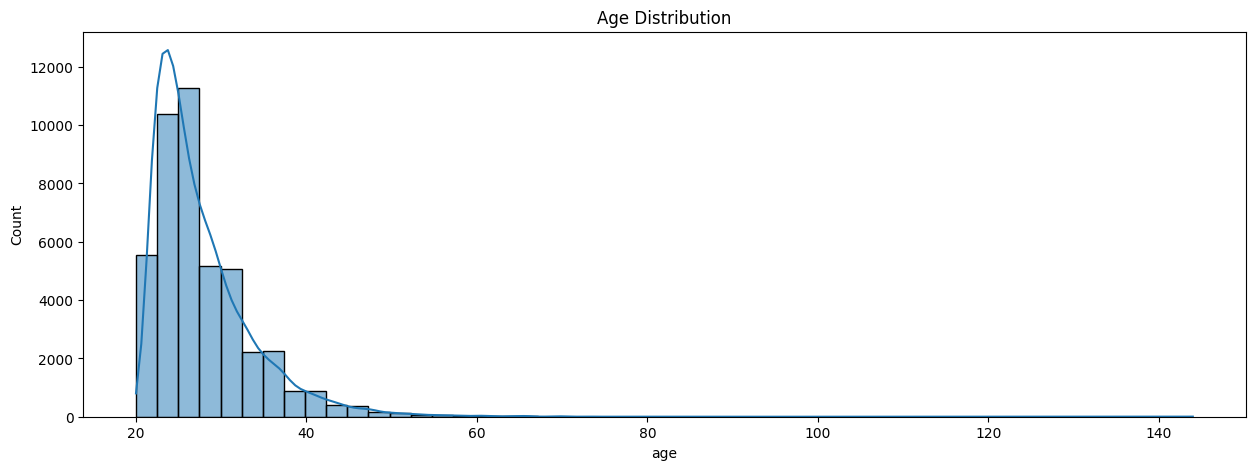

In [9]:
# Visualize using histogram
plt.figure(figsize=(15,5))
sns.histplot(data['age'], bins=50, kde=True)
plt.title('Age Distribution')
plt.show()

In [10]:
# Count number of aplicant for each gender
gender = data.groupby('gender')['gender'].value_counts().reset_index()
gender

,gender,count
0,female,20159
1,male,24841


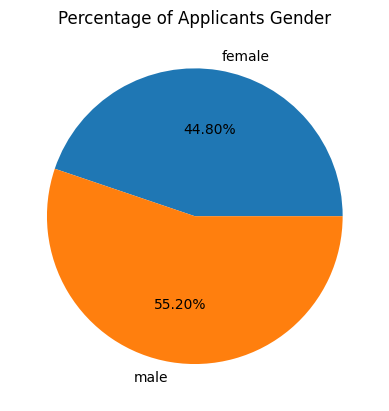

In [11]:
# Visualize using piechart
plt.pie(x=gender['count'], labels=gender['gender'], autopct='%1.2f%%')
plt.title('Percentage of Applicants Gender')
plt.show()

Dari perhitungan data gender dan visualisasi diatas, diperoleh informasi bahwa 55.2% pemohon adalah laki-laki (male) dan 44.8% adalah perempuan (female). Selanjutnya berikut adalah analisa mengenai level pendidikan tertinggi dari pemohon.

In [12]:
# Count the number of applicant for each education level
education = data.groupby('education')['education'].value_counts().sort_values(ascending=False).reset_index()
education

,education,count
0,Bachelor,13399
1,Associate,12028
2,High School,11972
3,Master,6980
4,Doctorate,621


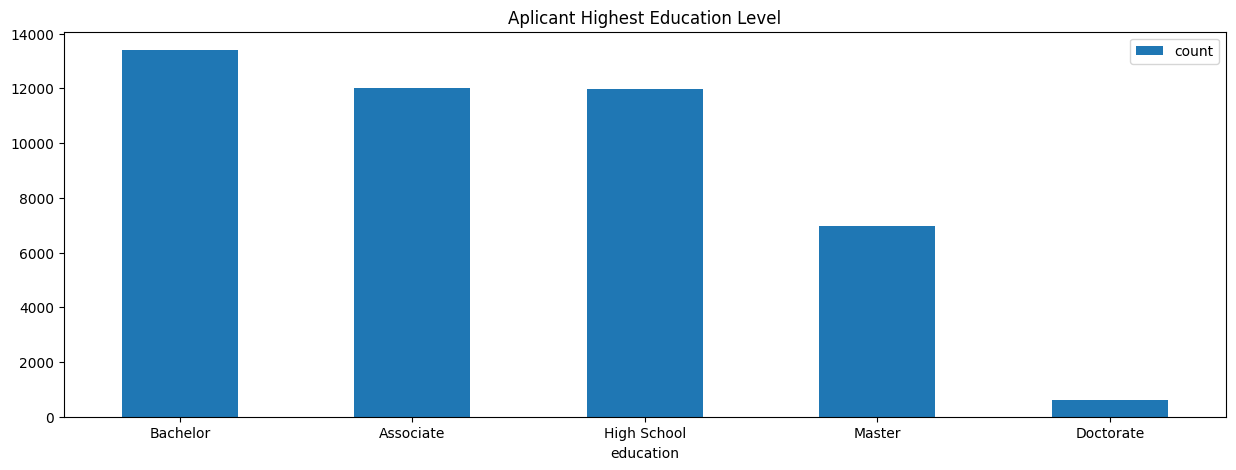

In [13]:
# Visualize using bar chart
education.plot(x='education',y=['count'],kind='bar', figsize=(15,5))
plt.title('Aplicant Highest Education Level')
plt.xticks(rotation=0) 
plt.show()

Dari hasil analisa diatas diketahui bahwa mayoritas pemohon memiliki tingkat pendidikan tertinggi bachelor dengan total pemohon terbanyak dan pemohon dengan tingkat pendidikan tertinggi doctorate adalah yang paling sedikit.

In [14]:
# Count the number of applicant for each homeOwnership
homeOwnership = data.groupby('homeOwnership')['homeOwnership'].value_counts().reset_index()
homeOwnership

,homeOwnership,count
0,MORTGAGE,18489
1,OTHER,117
2,OWN,2951
3,RENT,23443


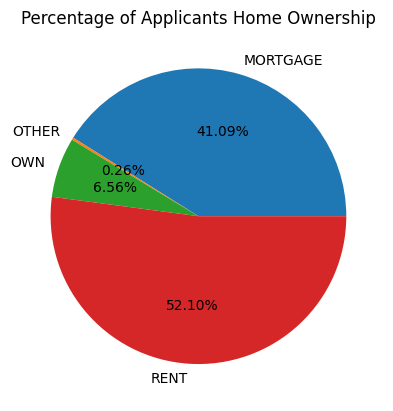

In [15]:
# Visualize using piechart
plt.pie(x=homeOwnership['count'], labels=homeOwnership['homeOwnership'], autopct='%1.2f%%')
plt.title('Percentage of Applicants Home Ownership')
plt.show()

Dari visualisasi diatas diperoleh informasi bahwa 52.10% pemohon dengan status home ownership rent, 41.09% mortgage, 6.56% own dan 0.26% other. Kemungkinan other ini adalah pemohon yang belum memiliki rumah, tinggal dengan keluarga atau pemohon tidak memiliki tempat tinggal tetap.

Selanjutnya akan dianalisa bagaimana rata-rata income berdasarkan kategori usia pemohon. Usia pemohon akan dibagi menjadi beberapa kelompok berdasarkan klasifikasi usia dari WHO yaitu:

- 15-24 tahun: Remaja
- 25-44 tahun: Dewasa
- 45-59 tahun: Usia pertengahan
- 60-74 tahun: Lansia
- 75 tahun ke atas: Usia lanjut

Source: [Klasifikasi Usia Menurut WHO](https://www.ilmu.co.id/klasifikasi-usia-menurut-who-pdf)

In [16]:
# Loop and condition for age category
ageCat = []
for i in data['age']:
    if  15 <= i <= 24 :
      ageCat.append('Remaja')
    elif 25 <= i <= 44:
      ageCat.append('Dewasa')
    elif 45 <= i <= 59:
      ageCat.append('Usia Pertengahan')
    elif 60 <= i <= 74:
      ageCat.append('Lansia')
    elif i >= 75 :
      ageCat.append('Usia Lanjut')

# Make new column and fill it with ageCat
data['ageCategory'] = ageCat
data.head(5)

,age,gender,education,income,empExp,homeOwnership,loanAmount,loanIntent,intRate,loanPctIncome,creditHistLen,creditScore,prevDefault,loanStatus,ageCategory
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,Remaja
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,Remaja
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,Dewasa
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,Remaja
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,Remaja


In [17]:
# Count the average income for each age category
incomeAvg = data.groupby('ageCategory')['income'].mean().sort_values(ascending=False)
incomeAvg

ageCategory
Usia Lanjut         1.617362e+06
Lansia              1.371125e+05
Usia Pertengahan    1.029623e+05
Dewasa              8.509461e+04
Remaja              6.928562e+04
Name: income, dtype: float64

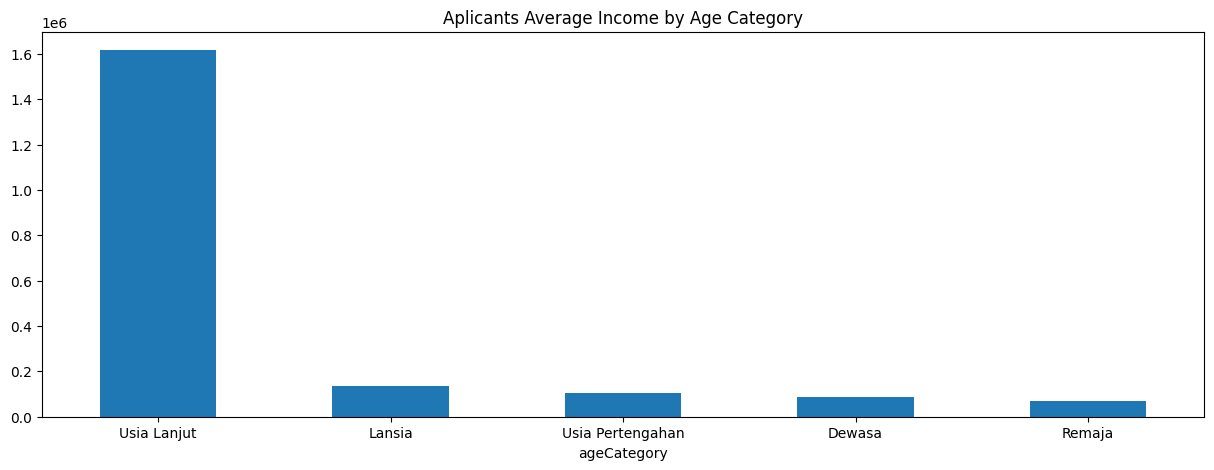

In [18]:
# Visualize using bar chart
incomeAvg.plot(x=incomeAvg,y=['income'],kind='bar', figsize=(15,5))
plt.title('Aplicants Average Income by Age Category')
plt.xticks(rotation=0) 
plt.show()

Dari analisa diatas diperoleh informasi bahwa customer dengan usia diatas 75 tahun (usia lanjut) memiliki income tertinggi yaitu 1.617.362 dollar. Hal ini mungkin terjadi dikarenakan pemohon adalah pensiunan dengan pemasukan yang tinggi atau pemohon merupakan pemilik bisnis dan memiliki penghasilan pasif yang besar.

In [19]:
# Count the average exmployee experience for each age category
empExp = data.groupby('ageCategory')['empExp'].mean().sort_values(ascending=False)
empExp

ageCategory
Usia Lanjut         88.583333
Lansia              42.000000
Usia Pertengahan    26.353674
Dewasa               7.136746
Remaja               1.051902
Name: empExp, dtype: float64

Dari hasil perhitungan diatas diperoleh informasi bahwa kelompok Usia Lanjut memiliki rata-rata lama pengalaman kerja yang paling panjang. Sehingga memungkinkan pemohon pada kategori kelompok ini memiliki pemasukan yang tinggi.

## 5.2. Analisa Rata-Rata Jumlah Pinjaman Berdasarkan Grup Usia

Pada bagian ini dilakukan analisa untuk memahami rata-rata jumlah pinjaman yang diajukan berdasarkan grup usia.

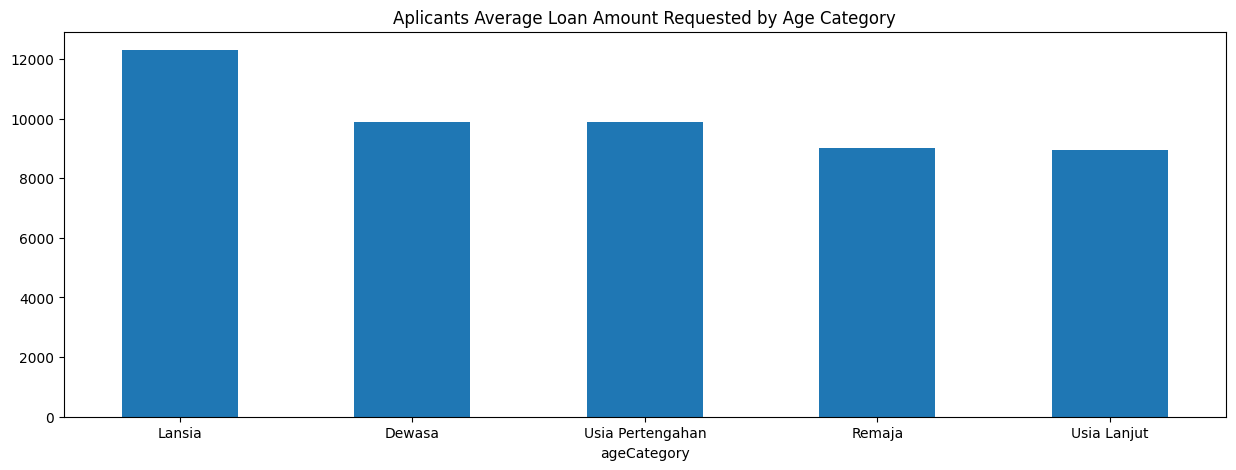

In [20]:
# Visualize using bar chart
loanAvg = data.groupby('ageCategory')['loanAmount'].mean().sort_values(ascending=False)
loanAvg.plot(x=loanAvg,y=['loanAmount'],kind='bar', figsize=(15,5))
plt.title('Aplicants Average Loan Amount Requested by Age Category')
plt.xticks(rotation=0) 
plt.show()

Rata-rata amount pinjaman tertinggi diajukan oleh pemohon dengan kategori usia lansia yaitu 60 - 74 tahun dan untuk kategori usia lainnya rata-rata amount pengajuan yang hampir sama yaitu antara 9000 sampai 10000 dollar.

## 5.3. Analisa Tujuan Pinjaman yang Dilakukan Pemohon

Pada bagian ini dilakukan analisa untuk memahami tujuan pinjaman yang paling sering diajukan pemohon.

In [21]:
# Count number of applicant for each intention
loanIntent = data.groupby('loanIntent')['loanIntent'].value_counts().sort_values(ascending=False).reset_index()
loanIntent

,loanIntent,count
0,EDUCATION,9153
1,MEDICAL,8548
2,VENTURE,7819
3,PERSONAL,7552
4,DEBTCONSOLIDATION,7145
5,HOMEIMPROVEMENT,4783


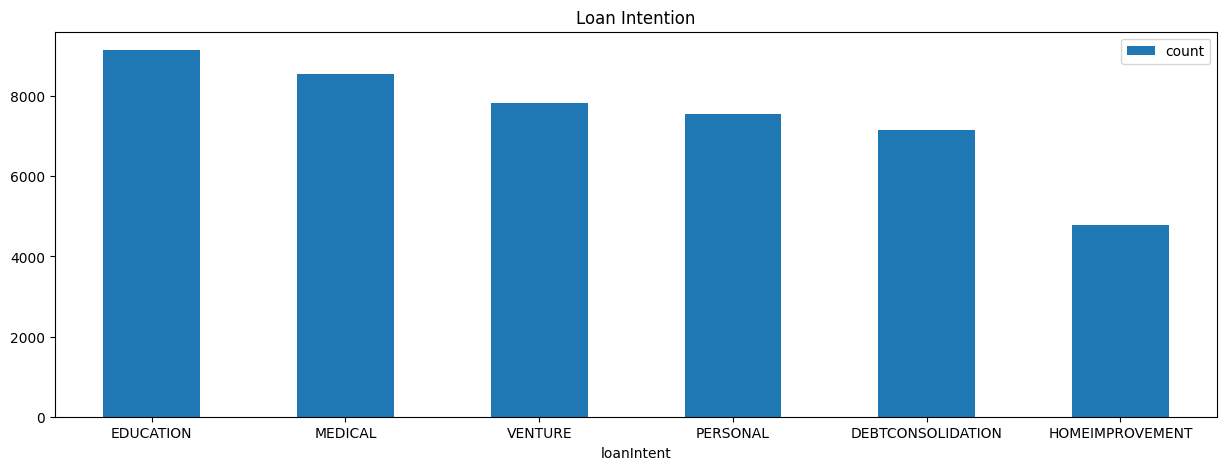

In [22]:
# Visualize using bar chart
loanIntent.plot(x='loanIntent',y=['count'],kind='bar', figsize=(15,5))
plt.title('Loan Intention')
plt.xticks(rotation=0) 
plt.show()


Dari analisa diatas diperoleh informasi bahwa tujuan pinjaman pemohon banyak dilakukan untuk edukasi (sekolah) dan kebutuhan medical (kesehatan).

## 5.4. Persentase Pemohon Rejected dan Pemohon Accepted

Pada bagian ini dilakukan analisa jumlah total status pemohon yang rejected dan accepted dari dataset agar memberikan gambaran keseimbangan data yang dapat membantu proses pemodelan.

In [23]:
# Count the number of each loanStatus
status = data.groupby('loanStatus')['loanStatus'].value_counts().reset_index()
status

,loanStatus,count
0,0,35000
1,1,10000


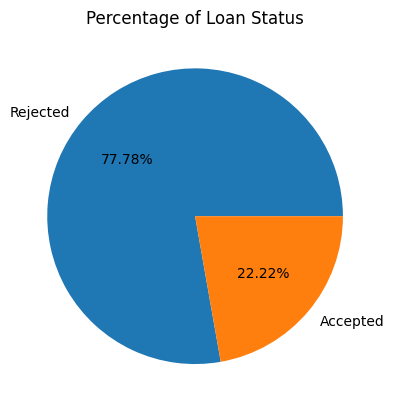

In [24]:
# Visualisasi data menggunakan pie chart
plt.pie(x=status['count'], labels=['Rejected','Accepted'], autopct='%1.2f%%')
plt.title('Percentage of Loan Status')
plt.show()

Dari keseluruhan dataset yang dimiliki 77.78% adalah data rejected dan 22.22% adalah data accepted. Menurut saya data ini kurang seimbang karena model akan cenderung banyak belajar mengenai data rejected. Sehingga, akan dilakukan data balancing pada proses feature engineering agar model dapat belajar dengan data yang lebih seimbang (tidak terlalu banyak belajar data yang rejected) dan menghasilkan prediksi yang lebih baik. Selain itu, data balancing dilakukan agar penggunaan metriks evaluasi accuracy dapat menghasilkan hasil yang baik dan tidak bias.

## 5.5. Korelasi Antar Kolom Numerical

Pada bagian ini akan dilakukan analisa korelasi antar kolom numerical untuk memahami korelasi tiap kolom numerical dengan lebih baik.

In [25]:
# list numerical column
cols = ['age','income','empExp', 'loanAmount','intRate','loanPctIncome','creditHistLen','creditScore']

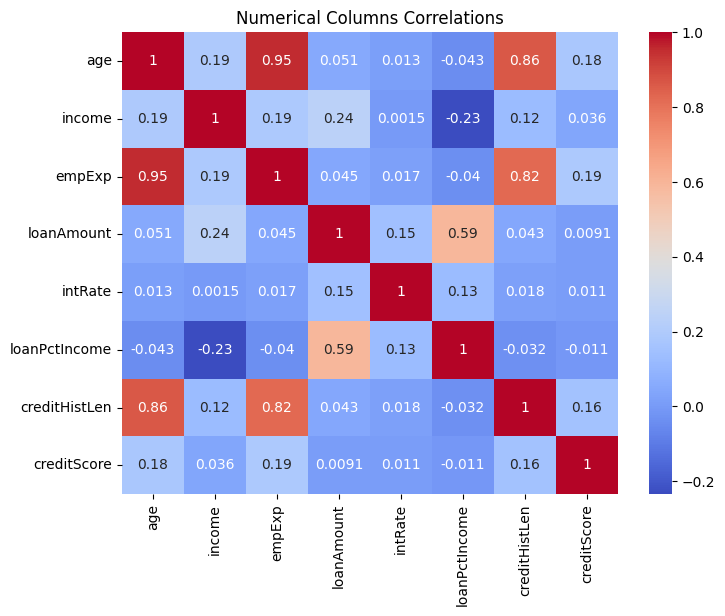

In [26]:
# count the correlation value
correlationMatrix = data[cols].corr()

# Visualisasi correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.title('Numerical Columns Correlations')
plt.show()

Dari hasil visualisasi diatas diperoleh informasi bahwa:
1. Kolom age berkorelasi kuat positif terhadap empExp yang artinya semakin tua usia pemohon maka, pengalaman kerjanya juga semakin lama. Selain itu, kolom age juga berkorelasi kuat positif dengan creditHistLen artinya, semakin tua usia pemohon maka, semakin lama juga pemohon sudah memiliki dan menggunakan kredit atau pinjaman. Hal ini dapat menunjukkan bahwa usia yang lebih tua cenderung memiliki pengalaman kredit atau pinjaman yang lebih lama dan kemungkinan memiliki financial behaviour yang lebih baik dan matang terutama dalam hal mengelola kredit atau pinjaman.
2. Kolom empExp memiliki korelasi kuat positif dengan creditHistLen, artinya bahwa semakin lama pengalaman kerja pemohon maka, semakin lama juga pemohon sudah memiliki kartu kredit atau pinjaman.
3. Kolom loanAmount memiliki korelasi kuat positif dengan kolom loanPctIncome, artinya, jika amount pinjaman yang diajukan semakin tinggi maka persentase jumlah pinjaman dibagi dengan income juga semakin tinggi.

# 6. Feature Engineering

Pada bagian ini akan dilakukan persiapan data sebelum model training seperti, membagi data menjadi Train Set dan Test Set, handling missing value, handling outlier, scaling, encoding dan proses lain yang dibutuhkan.

## 6.1. Split between X (Feature) and y (Target)

Pada bagian ini akan dilakukan pemisahan antara feature (X) dan target (y). Sesuai dengan tujuan awal bahwa model nantinya akan memprediksi apakah pengajuan pinjaman dari pemohon akan di approved atau di reject maka, target (y) adalah kolom loanStatus dan kolom lainnya adalah feature (X).

Sebelum memisahakan X dan y saya akan menghapus kolom ageCategory yang digunakan pada saat EDA  karena pada bagian Feature Engineering saya ingin menggunakan data original.

In [27]:
# Delete ageCategory column from dataset
data.drop(columns= 'ageCategory', inplace=True)
data.head(5)

,age,gender,education,income,empExp,homeOwnership,loanAmount,loanIntent,intRate,loanPctIncome,creditHistLen,creditScore,prevDefault,loanStatus
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [28]:
# Splitting between X dan y
X = data.drop(columns='loanStatus', axis=1)
y = data['loanStatus']

# Display X
X.head(5)

,age,gender,education,income,empExp,homeOwnership,loanAmount,loanIntent,intRate,loanPctIncome,creditHistLen,creditScore,prevDefault
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No


In [29]:
# Display y
y.head(5)

0    1
1    0
2    1
3    1
4    1
Name: loanStatus, dtype: int64

## 6.2. Split Numerical and Categorical Columns

Pada bagian ini dilakukan split antara kolom dengan tipe data numerical dan tipe data categorical pada feature sesuai dengan sifat asli pada masing-masing kolom, tujuannya agar memudahkan analisa pengolahan data berdasarkan tipe datanya.

numCols akan berisi nama kolom dengan tipe data numerical.

catCols akan berisi nama kolom dengan tipe data categorical.

In [30]:
# Display X
X.head(5)

,age,gender,education,income,empExp,homeOwnership,loanAmount,loanIntent,intRate,loanPctIncome,creditHistLen,creditScore,prevDefault
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No


In [31]:
# Split Numerical and Categorical Columns
numCols = ['age','income','empExp','loanAmount','intRate','loanPctIncome','creditHistLen','creditScore']
catCols = ['gender','education','homeOwnership','loanIntent','prevDefault']

## 6.3. Handling Cardinality

Pada bagian ini dilakukan pemeriksaan banyaknya unique value untuk kolom categorical. Jika ditemukan lebih dari 10 unique value pada 1 kolom maka, akan dilakukan handling cardinality karena termasuk ke dalam kategori high cardinality.

In [32]:
# Checking number of unique value in each categorical columns
for col in X[catCols]:
    print(f'Number of unique value of column {col}:', X[col].nunique())

Number of unique value of column gender: 2
Number of unique value of column education: 5
Number of unique value of column homeOwnership: 4
Number of unique value of column loanIntent: 6
Number of unique value of column prevDefault: 2


Setelah melakukan pemeriksaan terhadap cardinality, tidak ditemukan adanya kolom dengan lebih dari 10 unique value. Sehingga proses dapat dilanjutkan ke spliting Train-set dan Test-set.

## 6.4. Spliting Train-set dan Test-set

Pada bagian ini dilakukan pemisahan data yang akan digunakan oleh model untuk latihan (train) dan pengujian (test). Data yang akan digunakan untuk test sebesar 25% dari data yang ada.

In [33]:
# Split Train-set and Test-set
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 20)

# Check train size and test size
print('Train Size: ', XTrain.shape)
print('Test Size: ', XTest.shape)

Train Size:  (33750, 13)
Test Size:  (11250, 13)


Dari hasil spliting train set dan test set, data yang akan digunakan untuk train adalah sebanyak 33.750 baris dan 13 kolom dan data yang digunakan untuk test adalah sebanyak 11.250 baris dan 13 kolom.

## 6.5. Handling Missing Value

Pada bagian ini akan dilakukan pemeriksaan missing value dan handling missing value pada Train-set dan Test-set.

In [34]:
# Checking missing value on XTrain
XTrain.isna().sum()

age              0
gender           0
education        0
income           0
empExp           0
homeOwnership    0
loanAmount       0
loanIntent       0
intRate          0
loanPctIncome    0
creditHistLen    0
creditScore      0
prevDefault      0
dtype: int64

In [35]:
# Checking missing value on XTest
XTest.isna().sum()

age              0
gender           0
education        0
income           0
empExp           0
homeOwnership    0
loanAmount       0
loanIntent       0
intRate          0
loanPctIncome    0
creditHistLen    0
creditScore      0
prevDefault      0
dtype: int64

In [36]:
# Checking missing value on yTrain
yTrain.isna().sum()

np.int64(0)

In [37]:
# Checking missing value on yTest
yTest.isna().sum()

np.int64(0)

Dari hasil pemeriksaan missing value, tidak ditemukan adanya missing value. Maka, proses feature engineering dilanjutkan ke outlier handling.

## 6.6. Outlier Handling

Pada bagian ini akan dilakukan outlier handling pada dataset XTrain kolom numerical jika ditemukan adanya outlier.

Langkah awal yang dilakukan dalam handling outlier adalah melakukan pengecekan distribusi data.

In [38]:
# Function to find upperbound and lowerbound from feature that has normal distribution
def normalBoundaries(df):
    '''Function to find upperbound and lowerbound from feature that has normal distribution

    Parameter:
    df = feature name
    '''
    lowerBound = df.mean() - 3 * df.std()
    upperBound = df.mean() + 3 * df.std()

    return lowerBound, upperBound

In [39]:
# Function to find upperbound and lowerbound from feature that has skewed distribution
def skewedBoundaries(df, distance):
    '''Function to find upperbound and lowerbound from feature that has skewed distribution

    Parameter:
    df = feature name
    distance = scaling factors (1.5 for skewed and not extreme, 3 for skewed and extreme)    
    '''
    IQR = df.quantile(0.75) - df.quantile(0.25)

    lowerBound = df.quantile(0.25) - (IQR * distance)
    upperBound = df.quantile(0.75) + (IQR * distance)

    return lowerBound, upperBound

In [40]:
# Split XTrain-set to Numerical and Categorical
XTrainCat = XTrain[catCols]
XTrainNum = XTrain[numCols]

In [41]:
# Checking distribution of columns in XTrainNum and the outlier percentage
for col in XTrainNum:
    skew = XTrainNum[col].skew()
    print(f'Skewness {col}: {skew:.2f} ')
    if skew < -0.5 or skew > 0.5:
        if skew <-1 or skew > 1:
            lowerBound, upperBound = skewedBoundaries(XTrainNum[col], 3)
            inOutlier = XTrainNum[col][(XTrainNum[col]<lowerBound) | (XTrainNum[col]>upperBound)]
            print('Skewed Distribution - Extreme')
            print(f"Outlier percentage: {(len(inOutlier) / len(XTrainNum) * 100):.2f}%")
            print('')
        else:
            lowerBound, upperBound = skewedBoundaries(XTrainNum[col], 1.5)
            inOutlier = XTrainNum[col][(XTrainNum[col]<lowerBound) | (XTrainNum[col]>upperBound)]
            print('Skewed Distribution - Not Extreme')
            print(f"Outlier percentage: {(len(inOutlier) / len(XTrainNum) * 100):.2f}%")
            print('')
    else:
        print('Normal Distribution')
        lowerBound, upperBound = normalBoundaries(XTrainNum[col])
        inOutlier = XTrainNum[col][(XTrainNum[col]<lowerBound) | (XTrainNum[col]>upperBound)]
        print(f"Outlier percentage: {(len(inOutlier) / len(XTrainNum) * 100):.2f}%")
        print('')

Skewness age: 2.55 
Skewed Distribution - Extreme
Outlier percentage: 1.01%

Skewness income: 34.06 
Skewed Distribution - Extreme
Outlier percentage: 1.51%

Skewness empExp: 2.59 
Skewed Distribution - Extreme
Outlier percentage: 0.59%

Skewness loanAmount: 1.18 
Skewed Distribution - Extreme
Outlier percentage: 0.58%

Skewness intRate: 0.21 
Normal Distribution
Outlier percentage: 0.20%

Skewness loanPctIncome: 1.05 
Skewed Distribution - Extreme
Outlier percentage: 0.04%

Skewness creditHistLen: 1.65 
Skewed Distribution - Extreme
Outlier percentage: 0.37%

Skewness creditScore: -0.61 
Skewed Distribution - Not Extreme
Outlier percentage: 1.06%



Dari hasil perhitungan di atas, diperoleh informasi bahwa semua kolom pada XTrainNum memiliki outlier. Seluruh kolom memiliki distribusi skewed kecuali kolom intRate yang memiliki normal distribution. Berikut adalah visualisasi outliernya:

In [42]:
# List columns according to data distribution
normalColumns = ['intRate']
skewedColumns = ['creditScore']
extremeSkewedColumns = ['age','income','empExp','loanAmount','loanPctIncome','creditHistLen']

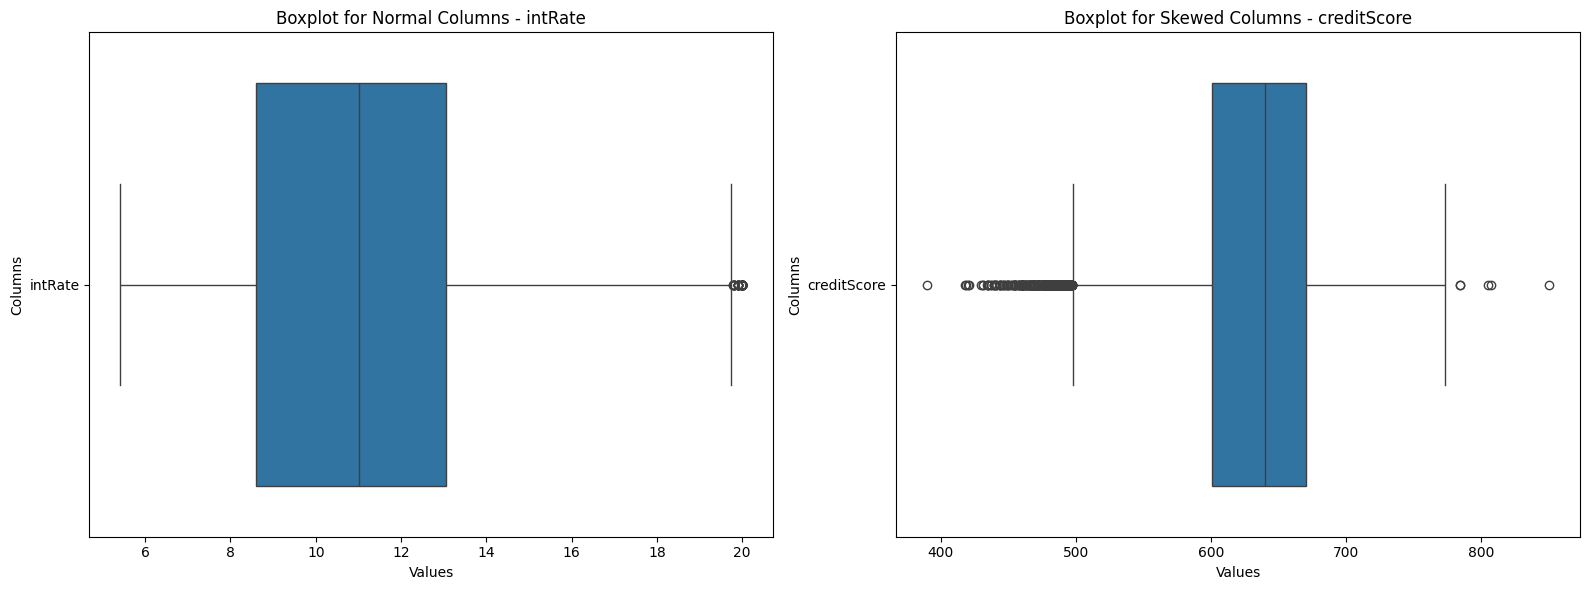

In [43]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for normal columns
sns.boxplot(data=XTrainNum[normalColumns], orient="h", ax=axes[0])
axes[0].set_title("Boxplot for Normal Columns - intRate")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Columns")

# Boxplot for skewed columns
sns.boxplot(data=XTrainNum[skewedColumns], orient="h", ax=axes[1])
axes[1].set_title("Boxplot for Skewed Columns - creditScore")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

Agar visualisasi dari extreme skewed distribution columns dapat dilihat dengan lebih jelas, maka visualisasinya akan dipisah. Berikut adalah visualisasi dari kolom yang berdistribusi skewed dan ekstrim:

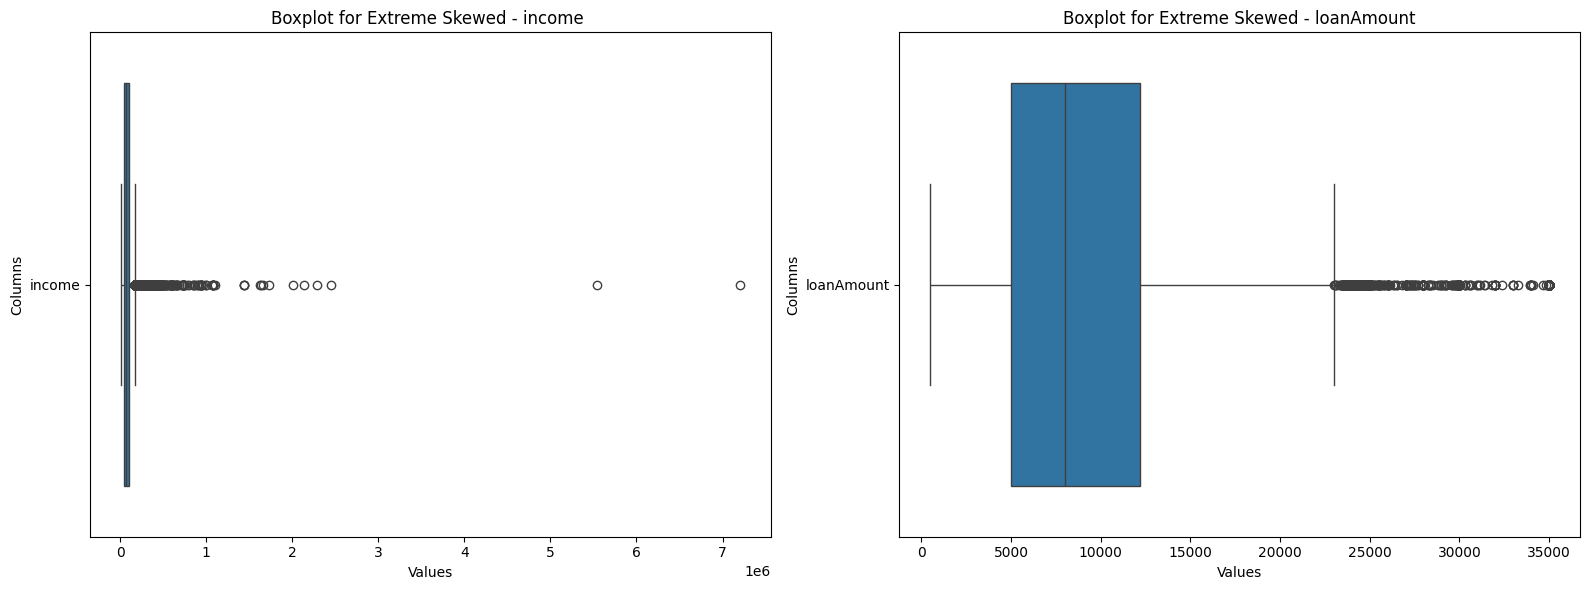

In [44]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for skewed columns
sns.boxplot(data=XTrainNum[['income']], orient="h", ax=axes[0])
axes[0].set_title("Boxplot for Extreme Skewed - income ")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Columns")

# Boxplot for extreme skewed columns
sns.boxplot(data=XTrainNum[['loanAmount']], orient="h", ax=axes[1])
axes[1].set_title("Boxplot for Extreme Skewed - loanAmount")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

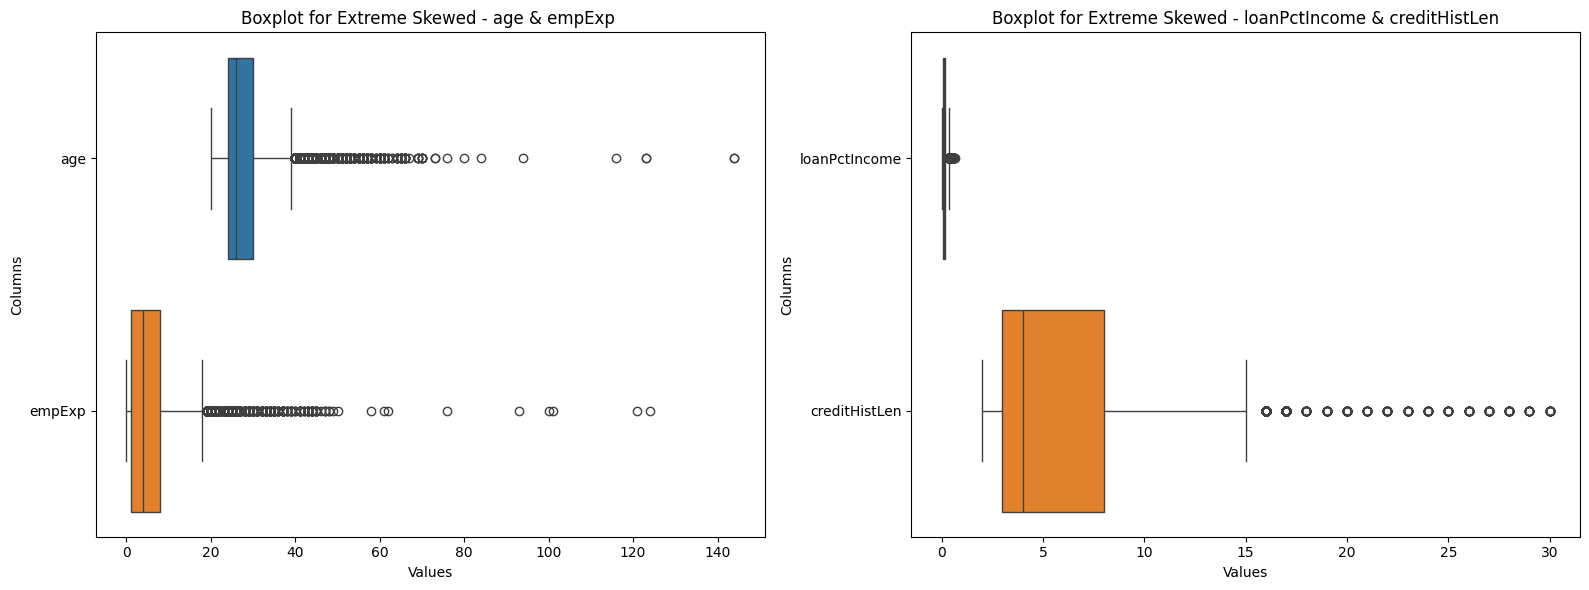

In [45]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for skewed columns
sns.boxplot(data=XTrainNum[['age','empExp']], orient="h", ax=axes[0])
axes[0].set_title("Boxplot for Extreme Skewed - age & empExp ")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Columns")

# Boxplot for extreme skewed columns
sns.boxplot(data=XTrainNum[['loanPctIncome','creditHistLen']], orient="h", ax=axes[1])
axes[1].set_title("Boxplot for Extreme Skewed - loanPctIncome & creditHistLen")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

Handling outlier akan dilakukan dengan metode capping untuk mempertahankan keseluruhan data dan tidak menghapus data. Metode capping dilakukan menggunakan winsorizer dengan detail sebagai berikut:
- Normal column dengan gaussian dan fold = 3.
- Skewed column dengan iqr dan fold = 1.5.
- Extreme skewed column dengan iqr dan fold = 3.

In [46]:
# Outlier handling for normal distribution column
winsoriserNormal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=['intRate'],
                            missing_values='ignore')

XTrainNumCapped1 = winsoriserNormal.fit_transform(XTrainNum)

In [47]:
# Outlier handling for skewed distribution column
winsoriserSkewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=['creditScore'],
                            missing_values='ignore')

XTrainNumCapped2  = winsoriserSkewed.fit_transform(XTrainNumCapped1)

In [48]:
# Outlier handling for extreme skewed distribution column
winsoriserExtremeSkewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=['age', 'income', 'empExp', 'loanAmount', 'loanPctIncome', 'creditHistLen'],
                            missing_values='ignore')

XTrainNumCapped  = winsoriserExtremeSkewed.fit_transform(XTrainNumCapped2)

Setelah dilakukan handling outlier dengan winsorizer, maka selanjutnya akan diperiksa kembali persentase outlier pada masing-masing kolom.

In [49]:
# Checking outlier percentage XTrainNumCapped after outlier handling
for col in XTrainNumCapped:
    skew = XTrainNumCapped[col].skew()
    if skew < -0.5 or skew > 0.5:
        if skew <-1 or skew > 1:
            lowerBound, upperBound = skewedBoundaries(XTrainNumCapped[col], 3)
            inOutlier = XTrainNumCapped[col][(XTrainNumCapped[col]<lowerBound) | (XTrainNumCapped[col]>upperBound)]
            print(f"Outlier prcentage {col}: {(len(inOutlier) / len(XTrainNumCapped) * 100):.2f}%")
        else:
            lowerBound, upperBound = skewedBoundaries(XTrainNumCapped[col], 1.5)
            inOutlier = XTrainNumCapped[col][(XTrainNumCapped[col]<lowerBound) | (XTrainNumCapped[col]>upperBound)]
            print(f"Outlier prcentage {col}: {(len(inOutlier) / len(XTrainNumCapped) * 100):.2f}%")
    else:
        lowerBound, upperBound = normalBoundaries(XTrainNumCapped[col])
        inOutlier = XTrainNumCapped[col][(XTrainNumCapped[col]<lowerBound) | (XTrainNumCapped[col]>upperBound)]
        print(f"Outlier prcentage {col}: {(len(inOutlier) / len(XTrainNumCapped) * 100):.2f}%")

Outlier prcentage age: 0.00%
Outlier prcentage income: 0.00%
Outlier prcentage empExp: 0.00%
Outlier prcentage loanAmount: 0.00%
Outlier prcentage intRate: 0.20%
Outlier prcentage loanPctIncome: 0.00%
Outlier prcentage creditHistLen: 0.00%
Outlier prcentage creditScore: 0.00%


Berikut adalah visualisasi setelah handling outlier:

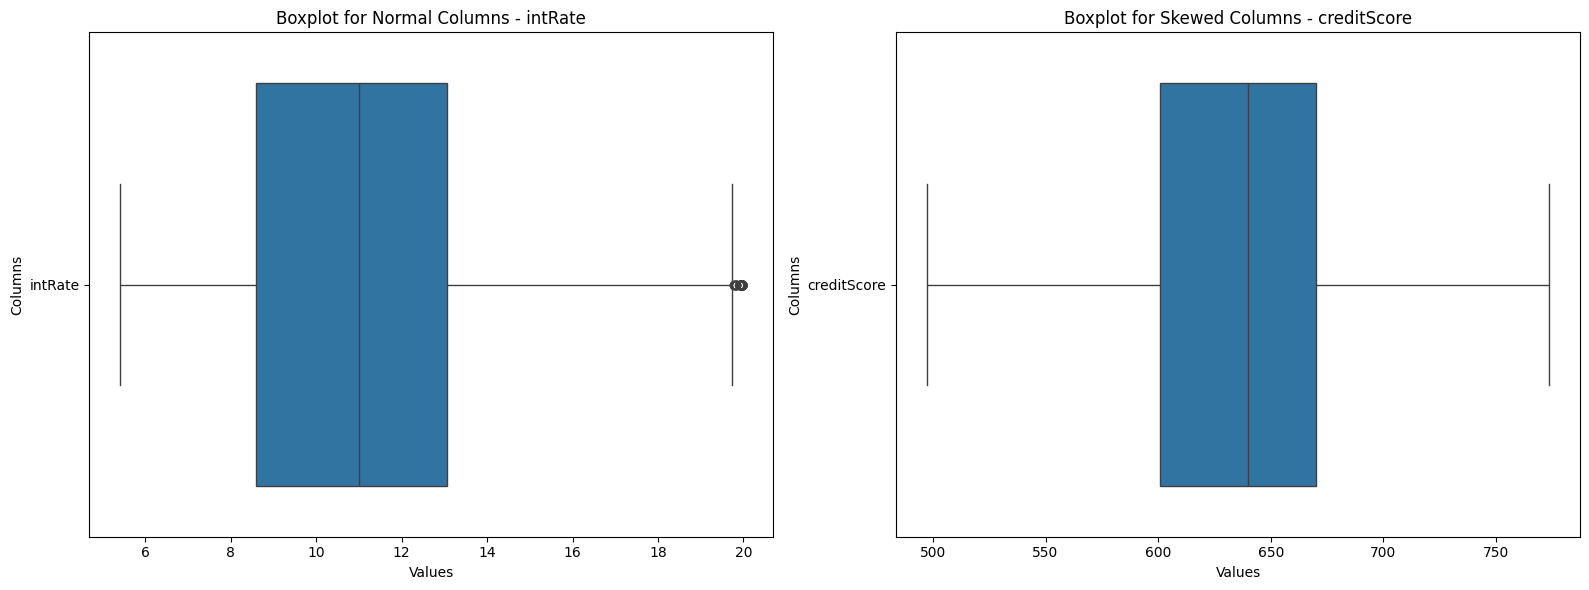

In [50]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for normal columns
sns.boxplot(data=XTrainNumCapped[normalColumns], orient="h", ax=axes[0])
axes[0].set_title("Boxplot for Normal Columns - intRate")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Columns")

# Boxplot for skewed columns
sns.boxplot(data=XTrainNumCapped[skewedColumns], orient="h", ax=axes[1])
axes[1].set_title("Boxplot for Skewed Columns - creditScore")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

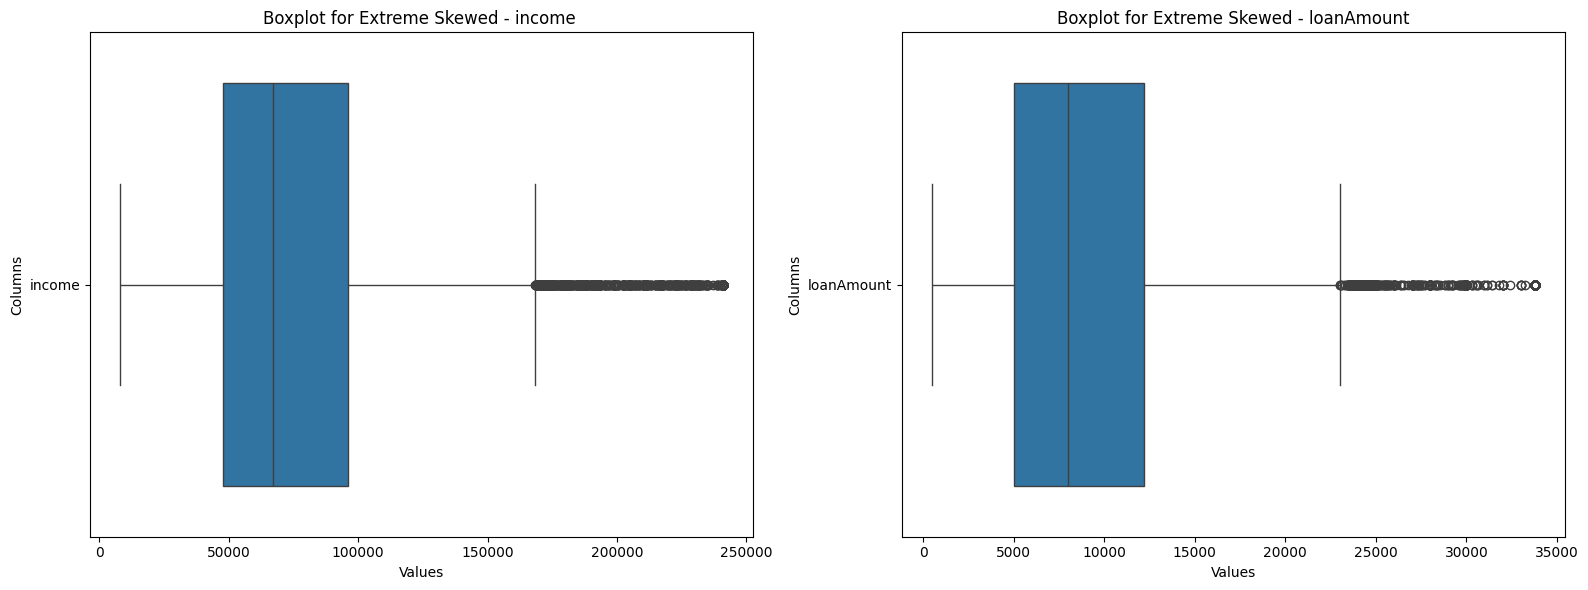

In [51]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for skewed columns
sns.boxplot(data=XTrainNumCapped[['income']], orient="h", ax=axes[0])
axes[0].set_title("Boxplot for Extreme Skewed - income ")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Columns")

# Boxplot for extreme skewed columns
sns.boxplot(data=XTrainNumCapped[['loanAmount']], orient="h", ax=axes[1])
axes[1].set_title("Boxplot for Extreme Skewed - loanAmount")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

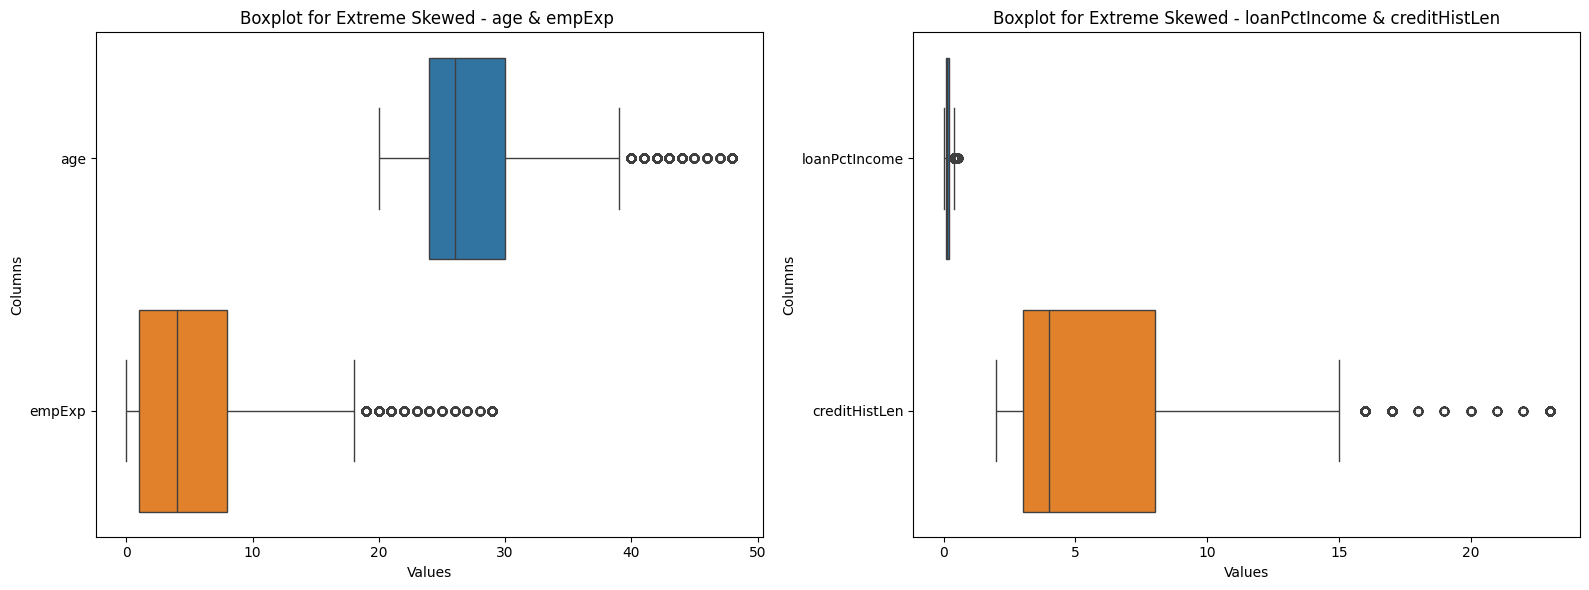

In [52]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for skewed columns
sns.boxplot(data=XTrainNumCapped[['age','empExp']], orient="h", ax=axes[0])
axes[0].set_title("Boxplot for Extreme Skewed - age & empExp ")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Columns")

# Boxplot for extreme skewed columns
sns.boxplot(data=XTrainNumCapped[['loanPctIncome','creditHistLen']], orient="h", ax=axes[1])
axes[1].set_title("Boxplot for Extreme Skewed - loanPctIncome & creditHistLen")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

Setelah dilakukan handling outlier, persentase outlier pada XTrainNum sudah 0% kecuali untuk kolom intRate yang tidak ada perubahan persentase outliernya. Namun, jika diperhatikan dari visualisasi, ada sedikit perubahan dari sebaran datanya yang terlihat lebih terkonsentrasi. Sehingga secara keseluruhan, dari hasil visualisasi sebelum dan sesudah penanganan outlier, dapat dilihat bahwa sebelum penanganan outlier, lebih banyak data yang menyebar di bawah lower bound dan di atas upper bound. Setelah dilakukan handling outlier, data terlihat lebih terkonsentrasi dalam rentang normal, data yang sebelumnya jauh diluar rentang sekarang masuk ke daerah batas wajar.

Maka selanjutnya dilakukan penggabungan kolom XTrainNumCapped dengan XTrainCat menjadi kolom XTrainNew yang sudah di handle outliernya.

In [53]:
# Concat between XTrainNumCapped and XTrainCat
XTrainNew = pd.concat([XTrainNumCapped, XTrainCat], axis=1)
XTrainNew.head(10)

,age,income,empExp,loanAmount,intRate,loanPctIncome,creditHistLen,creditScore,gender,education,homeOwnership,loanIntent,prevDefault
44655,27.0,41151.0,0,6000.0,14.98,0.15,5.0,666.0,male,Master,RENT,DEBTCONSOLIDATION,No
25784,34.0,108685.0,13,24250.0,10.62,0.22,7.0,611.0,female,Associate,MORTGAGE,PERSONAL,Yes
42524,37.0,29849.0,15,8000.0,12.72,0.27,11.0,665.0,male,High School,RENT,DEBTCONSOLIDATION,No
1287,23.0,31364.0,1,5000.0,9.99,0.16,3.0,617.0,male,Associate,MORTGAGE,PERSONAL,Yes
19845,30.0,46914.0,6,11000.0,7.51,0.23,8.0,649.0,male,Master,RENT,VENTURE,Yes
1278,23.0,31307.0,2,1000.0,11.48,0.03,4.0,603.0,male,Master,OWN,EDUCATION,No
18056,31.0,228896.0,9,24000.0,11.01,0.10,10.0,676.0,female,High School,MORTGAGE,MEDICAL,Yes
20487,32.0,39761.0,8,4800.0,9.99,0.12,6.0,507.0,male,Bachelor,RENT,HOMEIMPROVEMENT,No
20124,28.0,33975.0,5,4000.0,15.23,0.12,8.0,663.0,male,Associate,RENT,DEBTCONSOLIDATION,Yes
14462,24.0,37102.0,2,7500.0,10.96,0.20,4.0,671.0,male,Associate,OWN,HOMEIMPROVEMENT,Yes


## 6.7. Feature Selection

Pada tahap ini akan dilakukan pemilihan terhadap feature (X) yang memiliki korelasi dengan y (target). Sehingga akan dilakukan perhitungan nilai korelasi antara feature dengan target menggunakan nilai phi-k. Cara ini dipilih karena lebih efisien dan cocok untuk semua tipe data. Jika nilai phi-k > 0.5 maka artinya kedua feature memiliki hubungan yang kuat dan akan digunakan untuk proses pemodelan dan jika nilai phi-k <0.5 maka akan dilakukan analisa terhadap feature tersebut apakah benar-benar tidak memiliki korelasi dengan loanStatus.

In [54]:
# Count phi-k value
trainSet = pd.concat([XTrainNew, yTrain], axis = 1)

trainSetTypes = {
        'age':'interval', 
        'gender':'categorical', 
        'education':'categorical', 
        'income':'interval', 
        'empExp':'interval', 
        'homeOwnership':'categorical',
        'loanAmount':'interval', 
        'loanIntent':'categorical', 
        'intRate':'interval', 
        'loanPctIncome':'interval', 
        'creditHistLen':'interval',
        'creditScore':'interval', 
        'prevDefault':'categorical', 
        'loanStatus':'categorical'
}

intervalCols = [col for col, v in trainSetTypes.items() if v=='interval' and col in trainSet.columns]
len(intervalCols)

phikCorr = trainSet.phik_matrix(interval_cols = intervalCols)['loanStatus']
print(phikCorr)

age              0.048114
income           0.374905
empExp           0.027247
loanAmount       0.163567
intRate          0.477748
loanPctIncome    0.533587
creditHistLen    0.029952
creditScore      0.000000
gender           0.000000
education        0.000000
homeOwnership    0.388128
loanIntent       0.198426
prevDefault      0.752878
loanStatus       1.000000
Name: loanStatus, dtype: float64


Dari hasil perhitungan nilai phi-k, feature yang berhubungan kuat dengan loanStatus adalah loanPctIncome dan prevDefault. Sehingga, kedua kolom ini akan dipilih untuk proses pemodelan.

Dalam pemilihan feature-feature yang mempengaruhi hasil loanStatus, saya melakukan research dari beberapa sumber mengenai mengapa pengajuan loan (kredit) ditolak. Berdasarkan data yang saya pelajari, berikut adalah beberapa alasan pengajuan pemohon ditolak:
- Credit score terlalu rendah. Skor ini ditentukan oleh beberapa faktor, termasuk riwayat pembayaran, rasio penggunaan kredit, dan usia dari bentuk kredit tertua yang dimiliki.

- Income tidak stabil. Pendapatan juga dipertimbangkan saat memutuskan persetujuan pinjaman karena lembaga keuangan atau bank ingin selalu memastikan bahwa pemohon memiliki cukup penghasilan untuk membayar pinjaman dan menghindari gagal bayar.

- Jumlah pinjaman. Dengan jumlah yang lebih besar dari kemampuan finansial seseorang, bank atau lembaga keuangan sangat mungkin menolak pengajuan tersebut.

Maka, meskipun feature creditScore tidak memiliki korelasi, fitur ini akan tetap digunakan dalam proses pemodelan. Begitu pula dengan income, meskipun nilai korelasinya rendah (menunjukkan hubungan yang lemah), fitur ini akan tetap digunakan dalam proses pemodelan. Untuk loanAmount, tidak saya pilih karena pada saat melakukan EDA di bagian 5.5, ada korelasi kuat antara loanAmount dengan loanPctIncome, dan loanPctIncome sudah terpilih karena nilai phi-k > 0.5. 

Sehingga fitur-fitur yang terpilih adalah:
- loanPctIncome
- prevDefault
- creditScore
- income

Source:
- [Reasons Why Your Personal Loan Was Declined?](https://www.lendingtree.com/personal/reasons-why-your-personal-loan-was-declined/?msockid=32e5909f906f69f30f20840d91396852)
- [Why Would Pesonal Loan Declined](https://www.investopedia.com/why-would-personal-loan-declined-7972355)
- [Was Your Loan Denied?](https://www.forbes.com/advisor/personal-loans/loan-denied/)



In [55]:
# Delete column 
XTrainNew.drop(columns=['age', 'gender', 'education', 'empExp', 'homeOwnership', 'loanAmount', 'loanIntent', 'intRate', 'creditHistLen',],axis=1,inplace=True)
XTest.drop(columns=['age', 'gender', 'education', 'empExp', 'homeOwnership', 'loanAmount', 'loanIntent', 'intRate', 'creditHistLen',],axis=1,inplace=True)

In [56]:
# Display XTrainNew
XTrainNew.head(10)

,income,loanPctIncome,creditScore,prevDefault
44655,41151.0,0.15,666.0,No
25784,108685.0,0.22,611.0,Yes
42524,29849.0,0.27,665.0,No
1287,31364.0,0.16,617.0,Yes
19845,46914.0,0.23,649.0,Yes
1278,31307.0,0.03,603.0,No
18056,228896.0,0.10,676.0,Yes
20487,39761.0,0.12,507.0,No
20124,33975.0,0.12,663.0,Yes
14462,37102.0,0.20,671.0,Yes


In [57]:
# Display XTest
XTest.head(10)

,income,loanPctIncome,creditScore,prevDefault
33479,130661.0,0.14,554,Yes
22972,73187.0,0.02,657,Yes
20687,51156.0,0.20,661,No
41809,73086.0,0.14,694,No
26262,80264.0,0.17,620,Yes
30090,109060.0,0.05,660,Yes
8557,19837.0,0.40,675,No
36926,123202.0,0.19,679,No
39412,73038.0,0.27,538,No
42929,53877.0,0.28,646,No


## 6.8. Data Balancing

Pada tahap ini dilakukan data balancing terhadap XTrain dan yTrain menggunakan metode undersampling karena ingin mempertahankan keaslian data dan banyak data yang dimiliki untuk loanStatus = 0  (rejected). Data balancing ini dilakukan agar model dapat mempelajari data yang seimbang sehingga hasil prediksi yang dihasilkan tepat dan tidak bias.

In [58]:
# Cek data balancing
data['loanStatus'].value_counts()

loanStatus
0    35000
1    10000
Name: count, dtype: int64

In [59]:
# Concat XTrain and yTrain
trainData = pd.concat([XTrainNew, yTrain], axis=1)

# Split the majority and minority class
majorityClass = trainData[trainData['loanStatus'] == 0]
minorityClass = trainData[trainData['loanStatus'] == 1]

# Do the undersampling in majority class
majorityClassDrop = resample(majorityClass,
                            replace=False, 
                            n_samples=14000, 
                            random_state=20)


In [60]:
# Concat new majority class and minority class
balancedData = pd.concat([majorityClassDrop, minorityClass])

# Split X and y after balancing
XTrainBalanced = balancedData.drop('loanStatus', axis=1)
yTrainBalanced = balancedData['loanStatus']

# Check number of loanStatus
print(yTrainBalanced.value_counts())

loanStatus
0    14000
1     7500
Name: count, dtype: int64


Setelah dilakukan data balancing, untuk loanStatus rejected(0) jumlahnya 65% dan accepted (1) jumlahnya 35%. Sehingga data sudah lebih seimbang setelah dilakukan undersampling.

## 6.9. Preprocessing before Pipeline

Pada tahap ini akan dilakukan persiapan data sebelum processing model menggunakan pipeline. Data akan di split berdasarkan tipe datanya. 

Kolom numerical akan dimasukkan ke dalam kategori numerical sesuai dengan distribusi datanya (normal atau skew).

Kolom categorical akan dimasukkan ke dalam kategorical sesuai dengan tipe datanya (ordinal atau nominal).

Kolom income, loanPctIncome dan creditScore masuk ke dalam list numSkew karena termasuk kolom numerical dengan distribusi data skew (hasil yang diperoleh saat pengecekan outlier). Sehingga:
1. Handling missing value akan menggunakan strategy median.
2. Scaling akan menggunakan MinMaxScaler.

Kolom prevDefault masuk ke dalam list catNominal karena termasuk kolom categorical dengan tipe data nominal (tidak ada tingkatan). Sehingga:
1. Handling missng value akan menggunakan strategy most_frequent(modus).
2. Encoding akan menggunakan OneHotEncoder.


In [61]:
# Split numerical berdasarkan distribusi data, split categorical berdasarkan type data
numSkew = ['income','loanPctIncome','creditScore'] 
catNominal = ['prevDefault']

print(f'Numerical skew columns:\n{numSkew}')
print(" ")
print(f'Categorical nominal columns:\n{catNominal}')

Numerical skew columns:
['income', 'loanPctIncome', 'creditScore']
 
Categorical nominal columns:
['prevDefault']


In [62]:
# Create a Preprocessing Pipeline
numericalSkewColumns = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler())
categoricalNominalColumns = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore',sparse_output=False))

preprocessingPipeline = ColumnTransformer(transformers=
    [  
    ('pipeNumSkew', numericalSkewColumns, numSkew),
    ('pipeCatNominal', categoricalNominalColumns, catNominal)
    ]
,remainder='passthrough')

# 7. Modeling

## 7.1. Model Definition using Pipeline

Pada tahap ini dilakukan modeling menggunakan pipeline dengan beberapa algoritma yang telah disebutkan dalam tujuan project ini yaitu Logistic Regression, KNN, SVM, Decision Tree, Random Forest, dan XGBoost.

In [63]:
# Model Definition using pipeline
pipeLog = make_pipeline(preprocessingPipeline, LogisticRegression())
pipeKNN = make_pipeline(preprocessingPipeline, KNeighborsClassifier())
pipeSVC = make_pipeline(preprocessingPipeline, SVC())
pipeDT = make_pipeline(preprocessingPipeline, DecisionTreeClassifier())
pipeRF = make_pipeline(preprocessingPipeline, RandomForestClassifier())
pipeXGB = make_pipeline(preprocessingPipeline, XGBClassifier())

## 7.2. Cross Validation to Choose Best Model

Pada bagian ini dilakukan cross validation untuk memilih model terbaik dari beberapa algoritma yang telah dibuat dengan cv = 5. Sehingga, dengan membagi data menjadi 5 folds, setiap bagian data digunakan untuk validasi sebanyak satu kali dan untuk pelatihan sebanyak empat kali, dan diharapkan dapat memberikan hasil yang konsisten.

Scoring menggunakan accuracy karena sesuai dengan tujuan awal accuracy untuk melihat seberapa tepat model dapat memprediksi hasil dengan baik.

In [64]:
# Setting kfold
skFold = StratifiedKFold(n_splits = 5)

# Define Cross Validation for each model
cvLogModel = cross_val_score(pipeLog, XTrainBalanced, yTrainBalanced, cv = skFold, scoring='accuracy', n_jobs=-1) 
cvKNNModel = cross_val_score(pipeKNN, XTrainBalanced, yTrainBalanced, cv = skFold, scoring='accuracy', n_jobs=-1)
cvSVCModel = cross_val_score(pipeSVC, XTrainBalanced, yTrainBalanced, cv = skFold, scoring='accuracy', n_jobs=-1)
cvDTModel = cross_val_score(pipeDT, XTrainBalanced, yTrainBalanced, cv = skFold, scoring='accuracy', n_jobs=-1)
cvRFModel = cross_val_score(pipeRF, XTrainBalanced, yTrainBalanced, cv = skFold, scoring='accuracy', n_jobs=-1)
cvXGBModel = cross_val_score(pipeXGB, XTrainBalanced,yTrainBalanced, cv =skFold, scoring='accuracy',n_jobs=-1)

In [65]:
# Finding Best Model based on Cross_Val_Score (mean)
nameModel = []
cvscores = 0
for cv,name in zip([cvLogModel,cvKNNModel,cvSVCModel,cvDTModel,cvRFModel,cvXGBModel],
                   ['modelLog','modelKNN','modelSVC','modelDT','modelRF','modelXGB']):
  print(name)
  print('Recall - All - Cross Validation :', cv)
  print('Recall - Mean - Cross Validation :', cv.mean())
  print('Recall - std - Cross Validation :', cv.std())
  print('Recall - Range of Test Set :', (cv.mean()-cv.std()), '-' , (cv.mean()+cv.std()))
  print('-'*50)
  if cv.mean() > cvscores:
    cvscores = cv.mean()
    nameModel = name
  else:
    pass
print('Best Model:', nameModel)
print('Cross Val Mean from Best Model:', cvscores)

modelLog
Recall - All - Cross Validation : [0.83046512 0.82372093 0.82209302 0.8227907  0.8344186 ]
Recall - Mean - Cross Validation : 0.8266976744186045
Recall - std - Cross Validation : 0.004881283998862957
Recall - Range of Test Set : 0.8218163904197415 - 0.8315789584174675
--------------------------------------------------
modelKNN
Recall - All - Cross Validation : [0.82883721 0.81906977 0.81790698 0.82488372 0.82674419]
Recall - Mean - Cross Validation : 0.8234883720930233
Recall - std - Cross Validation : 0.004285637023177503
Recall - Range of Test Set : 0.8192027350698458 - 0.8277740091162008
--------------------------------------------------
modelSVC
Recall - All - Cross Validation : [0.83930233 0.82906977 0.82790698 0.8272093  0.83953488]
Recall - Mean - Cross Validation : 0.8326046511627908
Recall - std - Cross Validation : 0.005595718056986337
Recall - Range of Test Set : 0.8270089331058045 - 0.8382003692197771
--------------------------------------------------
modelDT
Recal

Dari hasil cross validation, diperoleh model terbaik adalah dengan algoritma XGBoost dengan nilai rata-rata tertinggi yaitu 0.855. Dan dilihat dari nilai standar deviasi yang rendah artinya hasil cukup konsisten. Maka, selanjutnya dilakukan training model menggunakan pipeline XGBoost.

In [66]:
# Fit pipeline on the training data
pipeXGB.fit(XTrainBalanced, yTrainBalanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeNumSkew',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['income', 'loanPctIncome',
                                                   'creditScore']),
                                                 ('pipeCatNominal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneho...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

# 8. Model Evaluation Before Tuning

Pada bagian ini, akan dilakukan evaluasi model yang telah di training menggunakan XGBoost. Evaluasi dilakukan dengan menggunakan accuracy dan ROC-AUC Score.

In [67]:
# Get predictions for both training and test data
yPredTrain = pipeXGB.predict(XTrainBalanced)
yPredTest = pipeXGB.predict(XTest)

In [68]:
# Print accuracy score
print('Accuracy score - Train Set  : ', accuracy_score(yTrainBalanced, yPredTrain))
print('Accuracy score - Test Set   : ', accuracy_score(yTest, yPredTest))

Accuracy score - Train Set  :  0.9097674418604651
Accuracy score - Test Set   :  0.8688


Dari hasil nilai accuracy score yang diperoleh pada data train dan test, diperoleh hasil di atas 80% untuk kedua set data. Hal ini menunjukkan bahwa model memiliki kinerja yang cukup baik dan seimbang antara data train dan data test. Dengan perbedaan nilai accuracy hanya 4% antara keduanya, model dapat dikatakan goodfit, artinya model berhasil mempelajari pola dari data tanpa menghafal. Selanjutnya, akan dilakukan pemeriksaan nilai ROC AUC untuk mengevaluasi seberapa mampu model dalam memisahkan kelas rejected dan approved.

In [69]:
# Menghitung AUC Score
yPredTrainProba = pipeXGB.predict_proba(XTrainBalanced)[:, 1]
aucTrain = roc_auc_score(yTrainBalanced, yPredTrainProba)

yPredTestProba = pipeXGB.predict_proba(XTest)[:, 1]
aucTest = roc_auc_score(yTest, yPredTestProba)

def statusROCAUC(testResult):
    evaluationTest = ""
    if testResult > 0.9:
        evaluationTest = 'Good'
    elif 0.8 <= testResult <= 0.9:
        evaluationTest = 'Fair'
    elif 0.7 <= testResult < 0.8:
        evaluationTest = 'Decent'
    elif 0.6 <= testResult < 0.7:
        evaluationTest = 'Not Great'
    elif testResult < 0.6:
        evaluationTest = 'Poor'
    return evaluationTest

print('AUC Score Train Set : ', aucTrain)
print('Evaluation Train Set: ', statusROCAUC(aucTrain))
print("")

print('AUC Score Test Set: ', aucTest)
print('Evaluation Test Set: ', statusROCAUC(aucTest))

AUC Score Train Set :  0.9747141571428571
Evaluation Train Set:  Good

AUC Score Test Set:  0.9422570057142857
Evaluation Test Set:  Good


Dari nilai ROC-AUC yang cukup tinggi baik pada data train maupun data test yaitu > 0.9 maka dapat dikatakan bahwa kemampuan model untuk membedakan antara kelas approved dan rejected sudah cukup baik (Good).

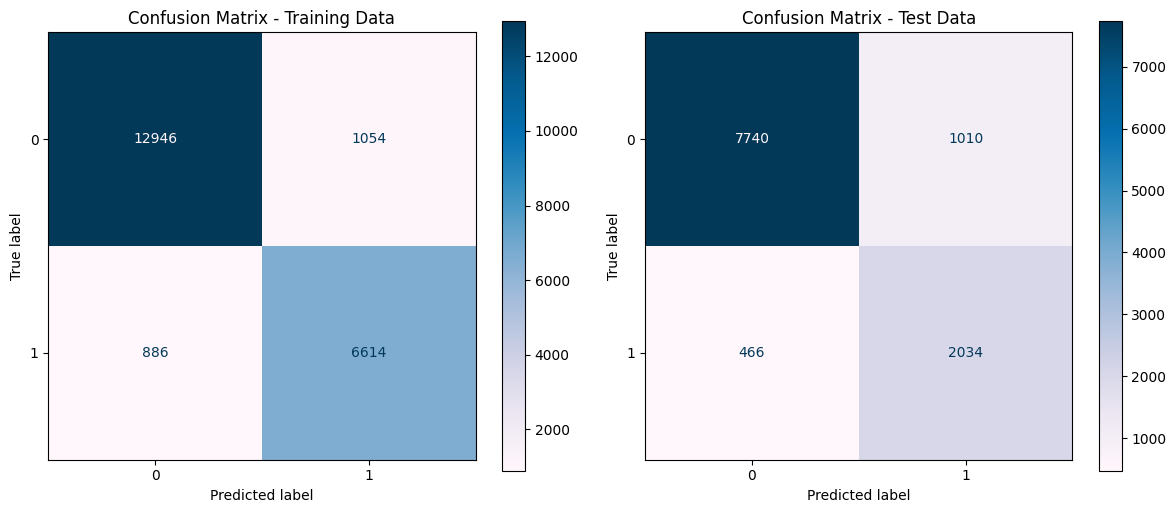

In [70]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix = ConfusionMatrixDisplay.from_estimator(pipeXGB, XTrainBalanced, yTrainBalanced, cmap='PuBu', ax=axes[0])
train_matrix.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix = ConfusionMatrixDisplay.from_estimator(pipeXGB, XTest, yTest, cmap='PuBu', ax=axes[1])
test_matrix.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

Dari visualisasi confusion matrix diatas dapat dilihat pula jumlah kesalahan prediksi yang lebih kecil dibandingkan jumlah prediksi yang benar.

Untuk data training:
1. False Negative (kesalahan memprediksi rejected yang seharusnya approved) adalah sebanyak 886 data.
2. False Positive (kesalahan memprediksi approved yang seharusnya rejected) adalah sebanyak 1054 data.
3. True Positive sebanyak 6614 data dan True Negative sebanyak 12.946 data (prediksi secara tepat sesuai dengan hasil actual)

Untuk data test:
1. False Negative (kesalahan memprediksi rejected yang seharusnya approved) adalah sebanyak 466 data.
2. False Positive (kesalahan memprediksi approved yang seharusnya rejected) adalah sebanyak 1010 data.
3. True Positive sebanyak 2034 data dan True Negative sebanyak 7740 data (prediksi secara tepat sesuai dengan hasil actual)


In [71]:
# Create function to create reports
def performanceReports(allReports, yTrain, yPredTrain, yTest, yPredTest, aucTrain, aucTest, name):
    # Calculate scores
    
    score_reports = {
        'Accuracy Train Set': accuracy_score(yTrain, yPredTrain),
        'Accuracy Test Set': accuracy_score(yTest, yPredTest),
        'ROC-AUC Score Train Set': aucTrain,
        'ROC-AUC Score Test Set': aucTest
    }

    # Store the report in the dictionary with the specified model name
    allReports[name] = score_reports
    return allReports

allReports = {}
allReports = performanceReports(allReports, yTrainBalanced, yPredTrain, yTest, yPredTest, aucTrain, aucTest, 'XGBoost without Tuning')

pd.DataFrame(allReports)

,XGBoost without Tuning
Accuracy Train Set,0.909767
Accuracy Test Set,0.868800
ROC-AUC Score Train Set,0.974714
ROC-AUC Score Test Set,0.942257


# 9. Model Improvement with Hyperparameter Tuning

Pada bagian ini akan dilakukan percobaan improvement model dengan hyperparameter tunning dan metode grid search dan beberapa parameter berikut:

- learning rate menentukan seberapa besar pengaruh decision tree dalam model akhir, semakin rendah nilai ini maka semakin baik model dalam menghindari overfitting.

- max depth menentukan kedalaman decision tree. Decision tree yang lebih dalam dapat menangkap pola yang lebih kompleks namun dapat menyebabkan overfitting.

- subsample merupakan proporsi sampel yang digunakan pada setiap boosting. Semakin kecil nilainya maka semakin besar kemungkinan model menghidari overfitting.

Sehingga, akan dicari komnbinasi parameter yang menghasilkan performance model yang lebih baik.


In [72]:
# Set Hyperparameter
parameterXGB = {
    'xgbclassifier__max_depth': [3, 4, 5, 6, 7, 8, 9, 10 ],
    'xgbclassifier__learning_rate': [0.1, 0.01, 0.001, 0.2, 0.3],
    'xgbclassifier__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]
    }
parameterXGB


{'xgbclassifier__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
 'xgbclassifier__learning_rate': [0.1, 0.01, 0.001, 0.2, 0.3],
 'xgbclassifier__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]}

In [73]:
# Menggunakan Grid Search
xgbGridSearchCV = GridSearchCV(pipeXGB,
                               parameterXGB,
                               cv=5,
                               n_jobs=-1,
                               scoring='accuracy')
xgbGridSearchCV.fit(XTrainBalanced, yTrainBalanced)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeNumSkew',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['income',
                                                                          'loanPctIncome',
                                                                          'creditScore']),
                                                                        ('pipeCatNominal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strate...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__learning_rate': [0.1, 0.01, 0.001, 0.2,
                                                          0.3],
                         'xgbclassifier__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'xgbclassifier__subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1]},
             scoring='accuracy')

In [74]:
# Best hyperparameters for XGB
print('Best hyperparameters for XGBoost:', xgbGridSearchCV.best_params_)

# Best accuracy for XGB
print('Best accuracy for XGBoost:', xgbGridSearchCV.best_score_)

# Save best XGB model to a variable
bestModel = xgbGridSearchCV.best_estimator_

Best hyperparameters for XGBoost: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 8, 'xgbclassifier__subsample': 1}
Best accuracy for XGBoost: 0.8595813953488373


Dari hasil hyperparameter tunning diperoleh model terbaik dengan menggunakan learning rate 0.1, max depth 8 dan subsample 1.


# 10. Model Evaluation After Tuning

Pada bagian ini model yang sudah dilakukan tunning akan dievaluasi dengan model yang sama sebelum hyperparameter tunning yaitu XGBoost

In [75]:
# Get predictions for training and testing set using the hyperparameter tuned model
yPredTrainTuned = bestModel.predict(XTrainBalanced)
yPredTestTuned = bestModel.predict(XTest)

In [76]:
# Print accuracy score
print('Accuracy score - Train Set  : ',accuracy_score(yTrainBalanced, yPredTrainTuned))
print('Accuracy score - Test Set  : ', accuracy_score(yTest, yPredTestTuned))

Accuracy score - Train Set  :  0.8917674418604651
Accuracy score - Test Set  :  0.8720888888888889


Dari hasil nilai accuracy score yang diperoleh pada data train dan test, diperoleh hasil di atas 80% untuk kedua set data. Hal ini menunjukkan bahwa model memiliki kinerja yang cukup baik dan seimbang antara data train dan data test. Dengan perbedaan nilai accuracy hanya 2% antara keduanya, model dapat dikatakan goodfit, artinya model berhasil mempelajari pola dari data tanpa menghafal. Selanjutnya, akan dilakukan pemeriksaan nilai ROC AUC untuk mengevaluasi seberapa mampu model dalam memisahkan kelas rejected dan approved.

In [77]:
# Menghitung AUC Score
yPredTrainProbaTuned = bestModel.predict_proba(XTrainBalanced)[:, 1]
aucTrainTuned = roc_auc_score(yTrainBalanced, yPredTrainProbaTuned)

yPredTestProbaTuned = bestModel.predict_proba(XTest)[:, 1]
aucTestTuned = roc_auc_score(yTest, yPredTestProbaTuned)

print('AUC Score Train Set : ', aucTrainTuned)
print('Evaluation Train Set: ', statusROCAUC(aucTrainTuned))
print("")

print('AUC Score Test Set: ', aucTestTuned)
print('Evaluation Test Set: ', statusROCAUC(aucTestTuned))

AUC Score Train Set :  0.9650970857142858
Evaluation Train Set:  Good

AUC Score Test Set:  0.9436055314285714
Evaluation Test Set:  Good


Dari nilai ROC-AUC yang cukup tinggi baik pada data train maupun data test yaitu > 0.9 maka dapat dikatakan bahwa kemampuan model untuk membedakan antara kelas approved dan rejected sudah cukup baik (Good).

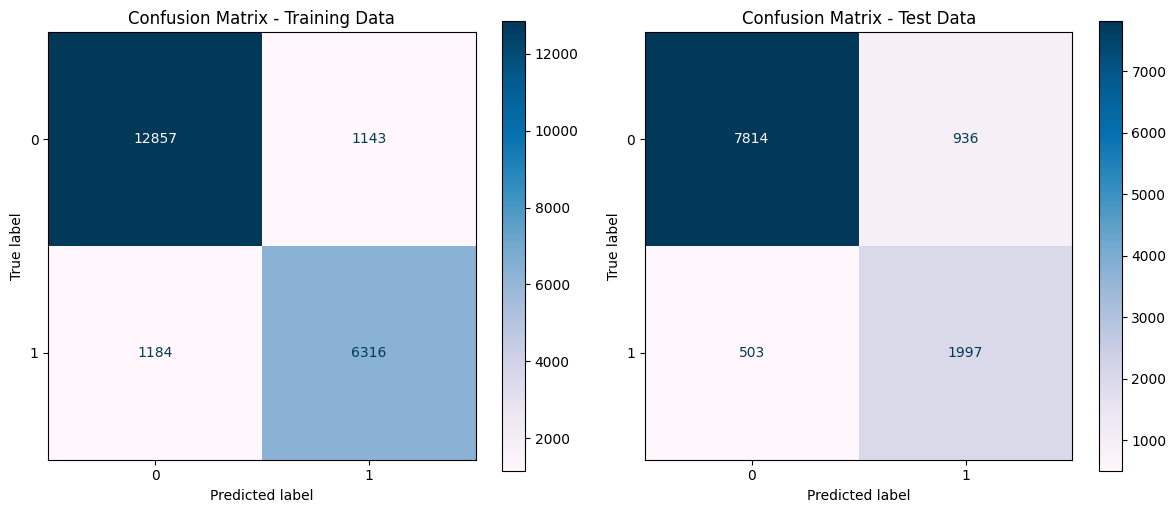

In [78]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix = ConfusionMatrixDisplay.from_estimator(bestModel, XTrainBalanced, yTrainBalanced, cmap='PuBu', ax=axes[0])
train_matrix.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix = ConfusionMatrixDisplay.from_estimator(bestModel, XTest, yTest, cmap='PuBu', ax=axes[1])
test_matrix.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

Dari visualisasi confusion matrix diatas dapat dilihat pula jumlah kesalahan prediksi yang lebih kecil dibandingkan jumlah prediksi yang benar.

Untuk data training:
1. False Negative (kesalahan memprediksi rejected yang seharusnya approved) adalah sebanyak 1184 data.
2. False Positive (kesalahan memprediksi approved yang seharusnya rejected) adalah sebanyak 1143 data.
3. True Positive sebanyak 6316 data dan True Negative sebanyak 12.857 data (prediksi secara tepat sesuai dengan hasil actual)

Untuk data test:
1. False Negative (kesalahan memprediksi rejected yang seharusnya approved) adalah sebanyak 503 data.
2. False Positive (kesalahan memprediksi approved yang seharusnya rejected) adalah sebanyak 936 data.
3. True Positive sebanyak 1997 data dan True Negative sebanyak 7814 data (prediksi secara tepat sesuai dengan hasil actual)


In [79]:
# Add results to the report
allReports = performanceReports(allReports, yTrainBalanced, yPredTrainTuned, yTest, yPredTestTuned, aucTrainTuned, aucTestTuned, 'XGBoost with Tuning')
reports = pd.DataFrame(allReports)

# 11. Compare Before-After Tuning

Pada bagian ini akan dilakukan perbandingan hasil sebelum dan sesudah tunning.

In [80]:
# Display performance reports
reports

,XGBoost without Tuning,XGBoost with Tuning
Accuracy Train Set,0.909767,0.891767
Accuracy Test Set,0.868800,0.872089
ROC-AUC Score Train Set,0.974714,0.965097
ROC-AUC Score Test Set,0.942257,0.943606


Perbandingan antara XGBoost sebelum tuning dan XGBoost setelah tuning menunjukkan adanya sedikit peningkatan dalam hal accuracy Test Set dan ROC-AUC Score Test Set, meskipun peningkatannya tidak terlalu besar.

Sebelum tuning, accuracy Train Set adalah 0.909 dan accuracy Test Set 0.868. Setelah tuning, accuracy Train Set sedikit menurun menjadi 0.891, tetapi accuracy Test Set meningkat sedikit menjadi 0.872. Peningkatan pada accuracy Test Set setelah tuning menunjukkan bahwa model lebih baik dalam memprediksi data test. Selain itu, penurunan pada accuracy Train Set dapat menunjukkan bahwa model setelah tuning tidak terlalu overfit dengan data train, yang bisa menjadi hal yang positif. 

ROC-AUC Score Train Set menurun dari 0.974 menjadi 0.965 setelah tuning dan ROC-AUC Score Test Set meningkat sedikit dari 0.942 menjadi 0.943 setelah tuning. Peningkatan sedikit pada ROC-AUC Score Test Set menunjukkan bahwa model setelah tuning lebih mampu membedakan antara kelas (accepted dan rejected) pada data Test.

Maka, model XGBoost setelah tuning menunjukkan sedikit peningkatan pada accuracy Test Set dan ROC-AUC Test Set, meskipun ada penurunan kecil di data train. Secara keseluruhan, meskipun tuning tidak mengubah hasil secara signifikan, tuning berhasil meningkatkan kemampuan model dalam memprediksi data Test dan membantu model menjadi lebih robust terhadap data Test. Maka, model setelah tuning dapat dikatakan lebih goodfit dan akan dipilih untuk prediksi data inference dan melakukan deployment.

# 12. Strengths and Limitations of Model

Pada bagian ini akan dilakukan evaluasi kelebihan dan kekurangan model yang dipilih.

In [81]:
# Create data for model evaluation
evaluation = pd.concat([XTrainBalanced, yTrainBalanced], axis=1).reset_index()

evaluation['yPredTrainTuned'] = yPredTrainTuned.tolist()
evaluation.head()

,index,income,loanPctIncome,creditScore,prevDefault,loanStatus,yPredTrainTuned
0,26957,145139.0,0.03,516.0,No,0,0
1,30344,63332.0,0.19,654.0,Yes,0,0
2,2028,19343.0,0.11,593.0,Yes,0,0
3,1328,32056.0,0.12,542.0,Yes,0,0
4,5813,57227.0,0.23,672.0,No,0,0


Berdasarkan salah satu sumber yang saya baca, credit score merupakan 3 digit angka yang dimulai dari 300 sampai 850 yang dihitung dengan informasi yang diperoleh dari laporan kredit. Berikut adalah kategori score credit secara umum:

1. 300 -  499 : Very Poor 
2. 500 - 600 : Poor
3. 601 - 660 : Fair
4. 661 - 780 : Good
5. 781 - 850 : Excellent

Maka, untuk membantu evaluasi kelebihan dan kekurangan, saya akan memberikan kategori pada creditScore pemohon.


Source :
- [What is a VantageScore](https://www.bankrate.com/credit-cards/advice/what-is-vantagescore/)

In [82]:
# Looping dan conditional untuk memberikan status credit
status = []
for score in evaluation['creditScore']:
    if 300 <= score <= 499:
        status.append("Very Poor")
    elif 500 <= score <= 600 :
        status.append("Poor")
    elif 601 <= score <= 660 :
        status.append("Fair")       
    elif 661 <= score <=780:
        status.append("Good")
    elif 781 <= score <= 850:
        status.append("Excellent")

# Menambahkan kolom statusCredit
evaluation['statusCredit']=status
evaluation.head(5)

,index,income,loanPctIncome,creditScore,prevDefault,loanStatus,yPredTrainTuned,statusCredit
0,26957,145139.0,0.03,516.0,No,0,0,Poor
1,30344,63332.0,0.19,654.0,Yes,0,0,Fair
2,2028,19343.0,0.11,593.0,Yes,0,0,Poor
3,1328,32056.0,0.12,542.0,Yes,0,0,Poor
4,5813,57227.0,0.23,672.0,No,0,0,Good


## 12.1. Strengths

Dari hasil confusion matrix pada bagian 10. dapat dilihat secara langsung bahwa model banyak memprediksi True (Positive & Negative) dibandingkan dengan False (Positive dan Negative) sehingga, ini merupakan salah satu kelebihan model. Untuk melihat kelebihan secara lebih detail dari model yang telah dibuat maka, akan dilakukan analisa pada hasil True Positive dan True Negative. Dimana model memprediksi dengan benar bahwa pengajuan pemohon di approved dan di reject.

In [83]:
# Pemeriksaan pola true positive
tp = evaluation.query('loanStatus == 1 & yPredTrainTuned ==1').drop('index',axis=1)
tp.head(10)

,income,loanPctIncome,creditScore,prevDefault,loanStatus,yPredTrainTuned,statusCredit
14000,41151.0,0.15,666.0,No,1,1,Good
14001,29849.0,0.27,665.0,No,1,1,Good
14002,39761.0,0.12,507.0,No,1,1,Poor
14003,37273.0,0.27,665.0,No,1,1,Good
14004,21310.0,0.15,608.0,No,1,1,Fair
14005,108864.0,0.23,630.0,No,1,1,Fair
14006,63262.0,0.41,653.0,No,1,1,Fair
14007,34361.0,0.15,587.0,No,1,1,Poor
14008,47037.0,0.26,644.0,No,1,1,Fair
14009,22387.0,0.14,631.0,No,1,1,Fair


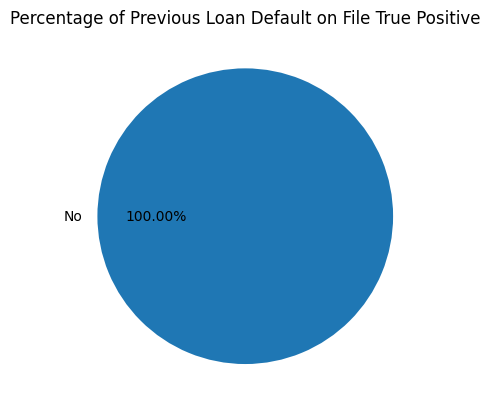

In [84]:
# Visualize using piechart
prevDefCount = tp['prevDefault'].value_counts().reset_index()
plt.pie(x=prevDefCount['count'], labels=prevDefCount['prevDefault'], autopct='%1.2f%%')
plt.title('Percentage of Previous Loan Default on File True Positive')
plt.show()

In [85]:
# Basic Statistic
tp.describe().T

,count,mean,std,min,25%,50%,75%,max
income,6316.0,53202.238917,31153.621256,8000.00,35425.75,45383.50,66142.75,241091.50
loanPctIncome,6316.0,0.220136,0.104894,0.01,0.14,0.23,0.29,0.55
creditScore,6316.0,627.471343,50.561336,497.50,595.00,634.00,665.00,755.00
loanStatus,6316.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
yPredTrainTuned,6316.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00


Dari hasil visualisasi pie chart dapat dilihat dengan jelas bahwa model memprediksi approved untuk pemohon yang tidak memiliki riwayat gagal bayar sebelumnya dan model tidak memprediksi approve pada pemohon yang memiliki riwayat gagal bayar. Hal ini menjadi sangat baik ketika menyetujui pengajuan loan untuk pemohon yang memiliki riwayat kredit yang baik. 

Untuk pemohon yang di approve memiliki jumlah annual income yang cukup besar yaitu dengan rata-rata 53.202 dollar. Selain itu, pemohon yang di approve juga rata-rata mengajukan jumlah loan sebesar 20% dari annual income mereka sehingga kemampuan pemohon untuk membayar pinjaman lebih besar dan pantas untuk di approve.

Dari hasil perhitungan basic statitic, untuk pemohon yang diterima memiliki rata-rata credit score 627, artinya masuk ke dalam kategori Fair. Namun, saya akan mencoba melakukan analisa lebih dalam dengan mengelompokkan data True Positive berdasarkan credit scorenya.

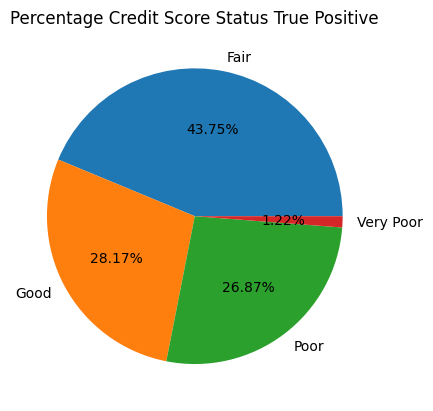

In [86]:
# Visualisasi status credit
statusCredit = tp['statusCredit'].value_counts().reset_index()
plt.pie(x=statusCredit['count'], labels=statusCredit['statusCredit'], autopct='%1.2f%%')
plt.title('Percentage Credit Score Status True Positive')
plt.show()

Pada saat perhitungan nilai phi-k di feature selection diperoleh hasil korelasi antara credit score dan loan status adalah 0 atau tidak ada korelasi antar keduanya namun, credit score tetap memberikan pengaruh yang signifikan pada proses modeling. Hal ini terlihat dari visualisasi pie chart di atas.

Hasil visualisasi tersebut menunjukkan bahwa model cenderung memprediksi loan approved dengan baik untuk pemohon yang memiliki credit score Good dan Fair, yang secara total mencakup lebih dari 70% True Positive. Hal ini mendukung bahwa model sudah cukup baik dalam mengutamakan pemohon dengan risiko kredit lebih rendah.

In [87]:
# Pemeriksaan pola true negative
tn = evaluation.query('loanStatus == 0 & yPredTrainTuned == 0').drop('index',axis=1)
tn.head(10)

,income,loanPctIncome,creditScore,prevDefault,loanStatus,yPredTrainTuned,statusCredit
0,145139.0,0.03,516.0,No,0,0,Poor
1,63332.0,0.19,654.0,Yes,0,0,Fair
2,19343.0,0.11,593.0,Yes,0,0,Poor
3,32056.0,0.12,542.0,Yes,0,0,Poor
4,57227.0,0.23,672.0,No,0,0,Good
5,87593.0,0.18,617.0,Yes,0,0,Fair
6,77300.0,0.06,680.0,Yes,0,0,Good
7,64830.0,0.11,629.0,No,0,0,Fair
8,60870.0,0.16,700.0,Yes,0,0,Good
9,145131.0,0.12,628.0,Yes,0,0,Fair


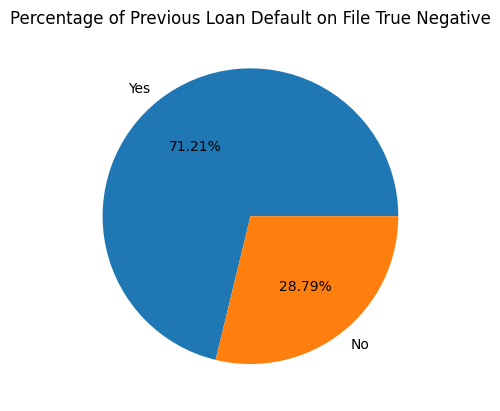

In [88]:
# Visualize using piechart
prevDefCount2 = tn['prevDefault'].value_counts().reset_index()
plt.pie(x=prevDefCount2['count'], labels=prevDefCount2['prevDefault'], autopct='%1.2f%%')
plt.title('Percentage of Previous Loan Default on File True Negative')
plt.show()

In [89]:
# Basic Statistic
tn.describe().T

,count,mean,std,min,25%,50%,75%,max
income,12857.0,85181.434433,44576.022127,10206.0,54777.00,73324.00,103179.00,241091.50
loanPctIncome,12857.0,0.117708,0.068855,0.0,0.07,0.11,0.16,0.55
creditScore,12857.0,632.590301,50.436155,497.5,600.00,640.00,670.00,773.50
loanStatus,12857.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
yPredTrainTuned,12857.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00


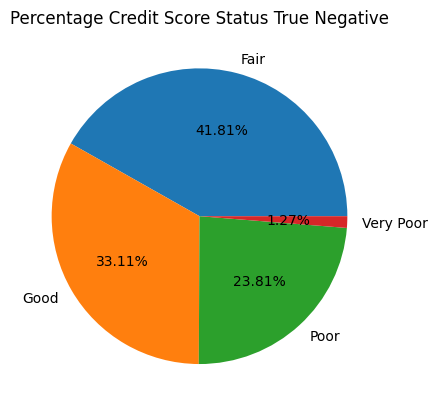

In [90]:
# Visualisasi status credit
statusCredit2 = tn['statusCredit'].value_counts().reset_index()
plt.pie(x=statusCredit2['count'], labels=statusCredit2['statusCredit'], autopct='%1.2f%%')
plt.title('Percentage Credit Score Status True Negative')
plt.show()

Jika dilihat dari persentase riwayat pemohon yang berada pada kelas true negative, 71.21% tidak memiliki riwayat gagal bayar dan 28.79% memiliki riwayat gagal bayar. Rata-rata income pemohon juga lebih tinggi dari pada nilai rata-rata income true positive dan loanPctIncome lebih rendah dibandingkan true positive. Selain itu, rata-rata credit score juga lebih baik daripada true positive. Meskipun demikian, model tetap berhasil memprediksi dengan benar bahwa pemohon statusnya rejected. Hal ini menunjukkan bahwa model dengan cukup baik menjaga keamanan loan status dan mencegah over lending pada pemohon yang mungkin tidak terlihat bermasalah dari feature yang di analisa.

Dari keseluruhan analisa kelebihan model maka, model ini dapat memberikan keuntungan bagi bank atau lembaga keuangan dalam beberapa hal berikut:
1. Meminimalkan resiko kerugian akibat pemohon gagal bayar, sehingga mampu menjaga stabilitas keuangan bank atau lembaga keuangan,
2. Meminimalkan resiko kehilangan peluang dari pemohon yang benar-benar layak di approve, 
3. Meningkatkan efisiensi operasional, mengurangi waktu proses persetujuan pinjaman dan memungkinkan bank atau lembaga keuangan melayani lebih banyak pemohon dengan cepat,
4. Meningkatkan kepuasan pelanggan (dalam hal ini pemohon) dan reputasi bank sehingga tercipta sustainability yang baik. 

## 12.2. Limitations

Untuk melihat kekurangan model yang telah dibuat maka, akan dilakukan analisa pada hasil False Positive dan False Negative yang artinya model salah memprediksi. 

- False Positive (kesalahan approved pinjaman yang seharusnya reject), kesalahan dalam memberikan pinjaman kepada pemohon yang beresiko tinggi akan berpotensi menyebabkan kerugian finansial bagi bank dan lembaga keuangan

- False Negative (kesalahan reject pinjaman yang seharusnya approved), kesalahan dalam memprediksi pemohon yang sebenarnya layak, akan membuat bank dan lembaga keuangan kehilangan peluang keuntungan yang dapat diperoleh dari peminjam yang membayar kembali pinjaman tepat waaktu.

In [91]:
# Pemeriksaan pola false positive
fp = evaluation.query('loanStatus == 0 & yPredTrainTuned == 1').drop('index', axis=1)
fp.head(5)

,income,loanPctIncome,creditScore,prevDefault,loanStatus,yPredTrainTuned,statusCredit
16,39790.0,0.25,668.0,No,0,1,Good
20,18709.0,0.06,660.0,No,0,1,Fair
28,37312.0,0.16,627.0,No,0,1,Fair
32,40230.0,0.11,681.0,No,0,1,Good
60,43870.0,0.11,649.0,No,0,1,Fair


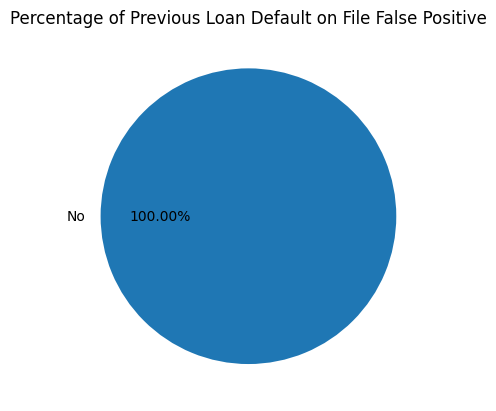

In [92]:
# Visualize using piechart
prevDefCount3 = fp['prevDefault'].value_counts().reset_index()
plt.pie(x=prevDefCount3['count'], labels=prevDefCount3['prevDefault'], autopct='%1.2f%%')
plt.title('Percentage of Previous Loan Default on File False Positive')
plt.show()

In [93]:
# Basic Statistic
fp.describe().T

,count,mean,std,min,25%,50%,75%,max
income,1143.0,57913.165792,31362.557820,12704.00,37352.0,47758.00,69738.50,241091.50
loanPctIncome,1143.0,0.165897,0.086324,0.01,0.1,0.15,0.22,0.55
creditScore,1143.0,633.928259,45.144816,502.00,603.5,640.00,667.00,743.00
loanStatus,1143.0,0.000000,0.000000,0.00,0.0,0.00,0.00,0.00
yPredTrainTuned,1143.0,1.000000,0.000000,1.00,1.0,1.00,1.00,1.00


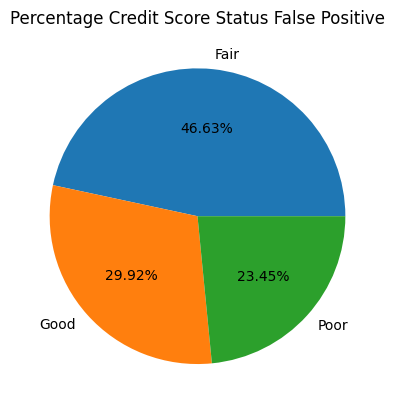

In [94]:
# Visualisasi status credit
statusCredit3 = fp['statusCredit'].value_counts().reset_index()
plt.pie(x=statusCredit3['count'], labels=statusCredit3['statusCredit'], autopct='%1.2f%%')
plt.title('Percentage Credit Score Status False Positive')
plt.show()

Dari hasil analisa pola false positive, ditemukan bahwa pola tersebut cenderung mirip dengan pola pada true positive yaitu:
1. Semua pemohon yang tidak memiliki riwayat gagal bayar cenderung diprediksi approved.
2. Persentase pengajuan loan dari anual income yang diajukan adalah 1% sampai dengan 5.5%.
3. Rata-rata credit score masuk ke dalam kategori Fair. 

Hal ini menunjukkan bahwa model memiliki kelemahan dalam membedakan dengan jelas antara pemohon yang benar-benar di approve (true positive) dan pemohon yang seharusnya rejected (false positive). Sehingga, meskipun nilai ROC-AUC model cukup tinggi sekitar 94%, nilai accuracy antara train dan set masih sekitar 87%-89% artinya, model masih belum sepenuhnya akurat. Kemungkinan besar, model masih mengalami kesulitan membedakan kelas karena pola yang mirip antara true positive dan false positive. Hal ini dapat disebabkan karena treshold yang belum optimal seperti yang diketahui pada saat feature selection bahwa tidak ditemukan korelasi antara credit score dengan loan status yang seharusnya actualnya ada korelasi berdasarkan sumber yang dibaca. 

In [95]:
# Pemeriksaan pola false negative
fn = evaluation.query('loanStatus == 1 & yPredTrainTuned == 0').drop('index', axis=1)
fn.head(5)

,income,loanPctIncome,creditScore,prevDefault,loanStatus,yPredTrainTuned,statusCredit
14013,55772.0,0.06,668.0,No,1,0,Good
14019,59689.0,0.17,682.0,No,1,0,Good
14020,60792.0,0.10,591.0,No,1,0,Poor
14025,46965.0,0.05,687.0,No,1,0,Good
14026,29498.0,0.20,664.0,No,1,0,Good


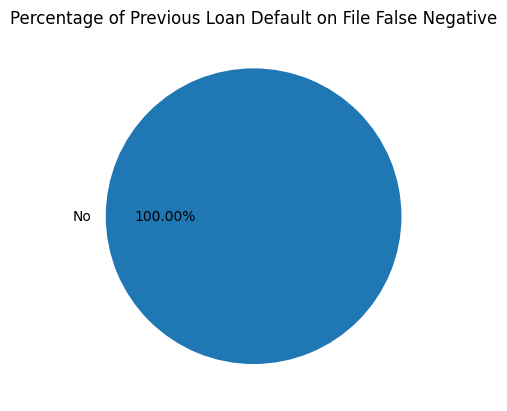

In [96]:
# Visualize using piechart
prevDefCount4 = fn['prevDefault'].value_counts().reset_index()
plt.pie(x=prevDefCount4['count'], labels=prevDefCount4['prevDefault'], autopct='%1.2f%%')
plt.title('Percentage of Previous Loan Default on File False Negative')
plt.show()

In [97]:
# Basic Statistic
fn.describe().T

,count,mean,std,min,25%,50%,75%,max
income,1184.0,90172.155828,45860.886107,18258.0,57563.50,76739.5,111175.75,241091.50
loanPctIncome,1184.0,0.106301,0.053238,0.0,0.06,0.1,0.14,0.25
creditScore,1184.0,656.607264,36.588045,555.0,631.00,660.0,683.00,754.00
loanStatus,1184.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.00
yPredTrainTuned,1184.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.00


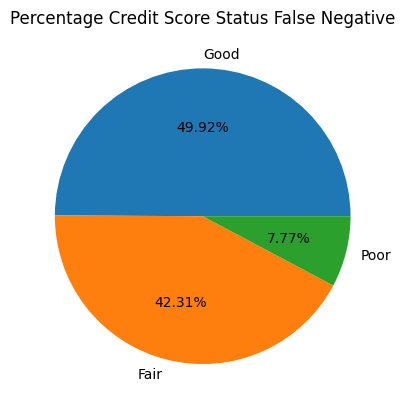

In [98]:
# Visualisasi status credit
statusCredit4 = fn['statusCredit'].value_counts().reset_index()
plt.pie(x=statusCredit4['count'], labels=statusCredit4['statusCredit'], autopct='%1.2f%%')
plt.title('Percentage Credit Score Status False Negative')
plt.show()

Dari karakteristik False Negative diperoleh informasi bahwa:

1. Pemohon tidak pernah gagal bayar, yang merupakan indikator kuat bahwa pemohon cukup layak.
2. Income rata-rata yang cukup tinggi, menunjukkan stabilitas finansial.
3. loanPctIncome yang cukup aman.
4. Credit score yang masuk kedalam kategori Fair.

Sehingga, dari karakteristik yang sebenarnya aman, model gagal mengenali pemohon yang seharusnya layak di approve. Pada True Negative 70 % pemohon tidak memiliki riwayat gagal bayar namun, prediksi benar rejected dan pada False Negative 100% pemohon tidak memiliki riwayat gagal bayar dan diprediksi rejected juga sehingga hal ini menunjukkan bahwa decision boundary model belum optimal dan model seperti memiliki kecenderungan bermain aman. Dalam hal ini model lebih mengutamakan meminimalkan risiko gagal bayar daripada memberikan persetujuan kepada pemohon yang sebenarnya layak.

Sehingga dari seluruh analisa kelemahan model, saran perbaikan yang dapat dilakukan meliputi:
1. Penambahan feature baru seperti Debt-to-Income (proporsi pendapatan bulanan yang dialokasikan untuk membayar pinjaman) untuk memberikan informasi tambahan pada model dalam membedakan pemohon yang layak dan tidak layak.
2. Mencoba mengkategorikan credit score sebelum proses feature engineering dan melakukan encoding terhadap kategori credit score dengan Ordinal Encoding untuk membantu model belajar dan memahami hierarki credit score.
3. Melakukan hyperparameter tuning dengan tambahan parameter lainnya seperti gamma.


# 13. Model Saving

Pada tahap ini dilakukan penyimpanan model terbaik yang akan digunakan untuk prediksi data inference dan dilakukan deployment.

In [99]:
# Save the best model
with open('bestModel.pkl', 'wb') as modelFile:
  pickle.dump(bestModel, modelFile)

# 14. Model Inference & Deployment

Untuk model inference pengerjaanya dilakukan dinotebook lain dengan nama file P1M2_verrenmonica_inf.ipynb

Untuk model deployment: [Deployment Link](https://huggingface.co/spaces/verrenmo/hacktiv8-milestoneproject)

# 15. Conclusion

Berdasarkan Exploratory Data Analysis yang telah dilakukan pada bagian 5. Maka, diperoleh kesimpulan:

1. Usia rata-rata applicant adalah 27-28 tahun dan banyak applicant dengan usia  23 tahun. Usia minimum applicant adalah 20 tahun dan usia maksimum 144 tahun. Distribusi usia applicant termasuk ekstrim skewed dan memiliki puncak yang lebih tajam daripada distribusi normal.
2. 44.8% applicant adalah perempuan (female) dan 55.2% nya adalah laki-laki (male).
3. Applicant terbanyak memiliki tingkat pendidikan terakhir Bachelor dan yang paling sedikit adalah dengan tingkat pendidikan terkahir doctorate.
4. 52.10% applicant dengan status home ownership rent, 41.09% mortgage,  6.56% own dan 0.26% other.
5. Applicant yang memiliki rata-rata income tertinggi berasal dari kategori Usia Lanjut dan memiliki pengalaman bekerja rata-rata 88 tahun.
6. Appplicant yang melakukan pengajuan jumlah pinjaman tertinggi ada pada kategori usia Lansia.
7. Tujuan pinjaman yang dilakukan oleh applicant yang terbanyak adalah education dan medical.
8. Jumlah rejected dan accepted pada dataset original tidak seimbang sehingga perlu dilakukan data balancing.
9. Kolom age berkorelasi kuat positif dengan empExp applicant dan creditHistLen. Kolom empExp berkorelasi kuat positif dengan creditHistLen dan loanAmount memiliki korelasi kuat positif dengan loanPctIncome.

Berdasarkan hasil cross validation dari model-model yang sudah dibangun dengan algoritma Logistic Regression, SVC, Decision Tree, Random Forest dan XGBoost diperoleh hasil bahwa model terbaik adalah model dengan algoritma XGBoost yang menghasilkan nilai rata-rata tertinggi. Dan dengan standar deviasi cukup rendah artinya model XGBoost cukup konsisten. 

Model XGBoost selanjutnya dilatih tanpa hyperparameter dan menghasilkan accuracy train set sebesar 0.909 dan test set 0.868. Selain itu, dari ROC-AUC diperoleh score 0.97 untuk train set dan 0.94 untuk test set. Artinya, model sebelum di tuning masuk ke dalam kategori goodfit. Kemudian, dilakukan hyperparameter tuning pada model XGBoost untuk meningkatkan performa model. Hasilnya, setelah tuning accuracy train set adalah 0.891 dan test set 0.872 dan ROC-AUC Score untuk train set adalah 0.96 dan untuk test set 0.94.
Maka, model setelah tuning mengalami sedikit peningkatan dan dapat dikatakan lebih goodfit daripada model sebelum tuning. Model ini yang akan dipakai untuk memprediksi data inference dan di-deploy.

Kelebihan model XGBoost setelah di tuning dapat memprediksi true positive dengan benar kepada applicant yang tidak memiliki riwayat gagal bayar dan memiliki credit score yang termasuk Good dan Fair. Sehingga model sudah cukup baik dalam mengutamakan applicant dengan resiko kredit rendah. Selain itu, model juga tetap berhasil memprediksi dengan benar applicant dengan status reject walaupun data yang diberikan lebih baik daripada data True Positif. Artinya, model mampu menjaga keamanan loan status dan mencegah over lending pada applicant yang mungkin beresiko namun tidak terlihat dari fitur yang dianalisa. Hal ini memberikan keuntungan bagi bank atau lembaga keuangan dalam beberapa hal berikut:
1. Meminimalkan resiko kerugian akibat gagal bayar, sehingga mampu menjaga stabilitas keuangan bank atau lembaga keuangan,
2. Meminimalkan resiko kehilangan peluang dari applicant yang benar-benar layak di approve, 
3. Meningkatkan efisiensi operasional, mengurangi waktu proses persetujuan pinjaman dan memungkinkan bank atau lembaga keuangan melayani lebih banyak applicant dengan cepat,
4. Meningkatkan kepuasan pelanggan (dalam hal ini applicant) dan reputasi bank sehingga tercipta sustainability yang baik. 

Kekurangan model XGBoost setelah dituning adalah masih belum dapat membedakan secara optimal pemohon yang seharusnya di approve dan di reject. Hal ini kemungkinan karena data yang kurang berkorelasi padahal secara aktual seharusnya berkorelasi. Selain itu, model juga memiliki kecenderungan bermain aman dan belum memiliki decision boundary yang optimal. Dalam hal ini model lebih mengutamakan meminimalkan risiko gagal bayar daripada memberikan persetujuan kepada pemohon yang sebenarnya layak. Maka, perbaikan yang dapat dilakukan adalah:

1. Penambahan feature baru seperti Debt-to-Income (proporsi pendapatan bulanan yang dialokasikan untuk membayar pinjaman) untuk memberikan informasi tambahan pada model dalam membedakan pemohon yang layak dan tidak layak.
2. Mencoba mengkategorikan credit score sebelum proses feature engineering dan melakukan encoding terhadap kategori credit score dengan Ordinal Encoding untuk membantu model belajar dan memahami hierarki credit score.
3. Melakukan hyperparameter tuning dengan tambahan parameter lainnya seperti gamma.

Dari hasil prediksi data inference dengan model yang telah dibuat, maka pemohon 1, 3, dan 4 pengajuannya diterima (approved) dan pemohon 2 dan 5 pengajuannya ditolak (rejected).

# 16. Conceptual Problems

**Latar Belakang Bagging dan Cara Kerjanya**:

Bagging (Bootstrap Aggregating) adalah salah satu teknik dalam ensemble learning yang bertujuan untuk meningkatkan performa model machine learning. Teknik ini bekerja dengan mengurangi variasi prediksi tanpa meningkatkan bias, sehingga efektif dalam mengurangi risiko overfitting.

Bagging bekerja dengan membuat beberapa subset data dari dataset asli melalui teknik bootstrap sampling (sampling dengan pengembalian). Selanjutnya, model dilatih secara paralel dan independen pada masing masing subset. Hasil prediksi dari tiap model kemudian digabungkan menggunakan rata rata untuk regresi atau voting mayoritas untuk klasifikasi.

Salah satu contoh dari bagging adalah Random Forest, yang menggunakan sekumpulan decision tree untuk membuat prediksi yang lebih stabil dan akurat.

**Random Forest vs XGBoost**:

Salah satu perbedaan antara Random Forest dan XGBoost ada pada prinsip dasarnya. Random forest menggunakan banyak decision tree dan masing-masing decision tree dibangun dengan subset acak dari feature dan train set, prediksi akhirnya diperoleh melalui voting mayoritas untuk klasifikasi dan rata-rata untuk regresi. Sedangkan XGBoost menerapkan metode boosting yang artinya decision tree dibangun secara berurutan dimana setiap decision tree mencoba untuk memperbaiki kesalahan dari decision tree sebelumnya.

Cara pembentukan model Random Forest menggunakan teknik bagging yang membangun model secara paralel dan melatih model secara indpenden satu sama lain. Sedangkan XGBoost menggunakan teknik boosting yang membangun model secara bertahap dan selalu berusaha mengurangi kesalahan dari model sebelumnya (sequential).

Random Forest lebih tahan terhadap overfitting sehingga dapat mengurangi potensi terjadinya overfitting sedangkan XGBoost dapat mengurangi potensi terjadinya underfitting namun lebih rentan terhadap overfitting jika parameternya tidak diatur dengan baik.

**Cross Validation**:

Cross Validation adalah metode statistik dalam machine learning untuk menguji efektivitas model. Cross validation membagi data menjadi beberapa folds untuk memastikan model tidak hanya bekerja baik pada data train tetapi juga reliable pada data baru. Dalam cross validation, data biasanya dipisahkan menjadi training set validation set. 

Tujuan dari cross validation adalah menghindari overfitting atau underfitting. Selain itu, cross validation membantu untuk memilih algoritma terbaik dengan membandingkan kinerja beberapa model berdasarkan nilai mean dan standar deviasi dari hasil validasi. Nilai rata-rata yang tinggi dan standar deviasi yang rendah merepresentaikan bahwa model konsisten dan goodfit. 

Beberapa metode cross validation yang sering digunakan adalah K-Fold Cross Validation dan Leave-One-Out Cross Validation.